## Can click and expand the ">" to view details for each section

### 1.0 Initial Data Understanding

#### 1.1 Load Datasets

In [ ]:
import os
import pandas as pd 
from tabulate import tabulate

# Define the file path
file_path = "Extended_Employee_Performance_and_Productivity_Data.csv"

# Check if the file exists in the current directory
if os.path.isfile(file_path):
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
    
    # Display the first five rows of the dataset
    print("\nFirst five rows of the dataset:")
    print(tabulate(df.head(), headers='keys', tablefmt='pretty', showindex=False))
else:
    print(f"Error: The file '{file_path}' was not found!")


Dataset loaded successfully!

First five rows of the dataset:
+-------------+------------------+--------+-----+------------+------------+------------------+-----------------+-------------------+----------------+---------------------+------------------+----------------+-----------+-----------------------+-----------+----------------+------------+-----------------------------+----------+
| Employee_ID |    Department    | Gender | Age | Job_Title  | Hire_Date  | Years_At_Company | Education_Level | Performance_Score | Monthly_Salary | Work_Hours_Per_Week | Projects_Handled | Overtime_Hours | Sick_Days | Remote_Work_Frequency | Team_Size | Training_Hours | Promotions | Employee_Satisfaction_Score | Resigned |
+-------------+------------------+--------+-----+------------+------------+------------------+-----------------+-------------------+----------------+---------------------+------------------+----------------+-----------+-----------------------+-----------+----------------+------------

#### 1.2 Observations

In [2]:
# (Rows, Columns)
print("(Rows, Columns)") 
print(df.shape , "\n") 

# View the data types and missing values
print(df.info(), "\n")  

# Count of duplicate rows
print("[Count of duplicate rows]") 
print(df.duplicated().sum(), "\n") 

# check columns
print("[Columns]") 
print(df.columns, "\n") 

(Rows, Columns)
(100000, 20) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  int64  
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours              

#### 1.3 Overview of the range 

In [3]:
df.describe()

,Employee_ID,Age,Years_At_Company,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50111.728190,41.016190,4.476750,2.808930,6299.678500,45.063160,24.418720,14.624360,7.004450,55.796810,10.010980,49.455010,0.927430,2.987059
std,28830.160295,11.249038,2.872459,1.430994,1365.239525,8.950426,14.465974,8.674372,4.328235,12.824786,5.491927,28.864345,0.827702,1.150049
min,1.000000,22.000000,0.000000,1.000000,3850.000000,30.000000,0.000000,0.000000,0.000000,30.000000,1.000000,0.000000,0.000000,1.000000
25%,25177.750000,31.000000,2.000000,2.000000,5250.000000,37.000000,12.000000,7.000000,3.000000,46.000000,5.000000,25.000000,0.000000,2.000000
50%,50184.500000,41.000000,4.000000,3.000000,6300.000000,45.000000,24.000000,15.000000,7.000000,56.000000,10.000000,49.000000,1.000000,2.980000
75%,75033.250000,51.000000,7.000000,4.000000,7200.000000,53.000000,37.000000,22.000000,11.000000,66.000000,15.000000,75.000000,2.000000,3.980000
max,100000.000000,60.000000,10.000000,5.000000,9000.000000,60.000000,49.000000,29.000000,14.000000,80.000000,19.000000,99.000000,2.000000,5.000000


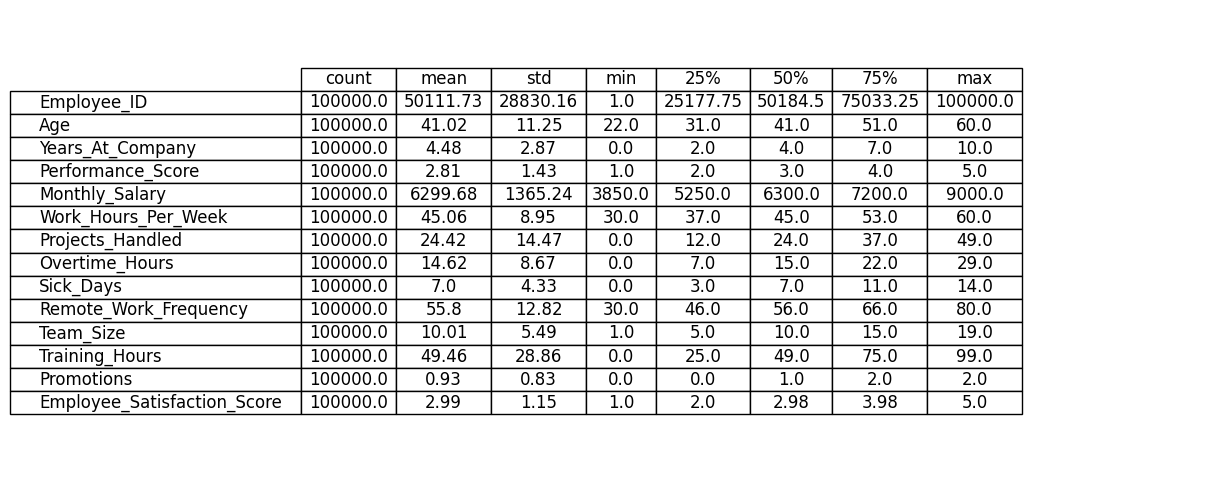

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Summary Statistics
summary = df.describe().transpose()
fig, ax = plt.subplots(figsize=(14, 6)) 
ax.axis("tight")
ax.axis("off")

# Create Table
table = ax.table(cellText=summary.round(2).values,
                 colLabels=summary.columns,
                 rowLabels=summary.index,
                 cellLoc="center",
                 loc="center")

# Adjust table properties
table.auto_set_font_size(False)
table.set_fontsize(12) 

# Column width 
for i in range(len(summary.columns)):
    table.auto_set_column_width([i]) 

for key, cell in table.get_celld().items():
    cell.set_height(0.05)  
    cell.set_width(0.1) 

plt.show()

#### 1.4 View Categorical Variables

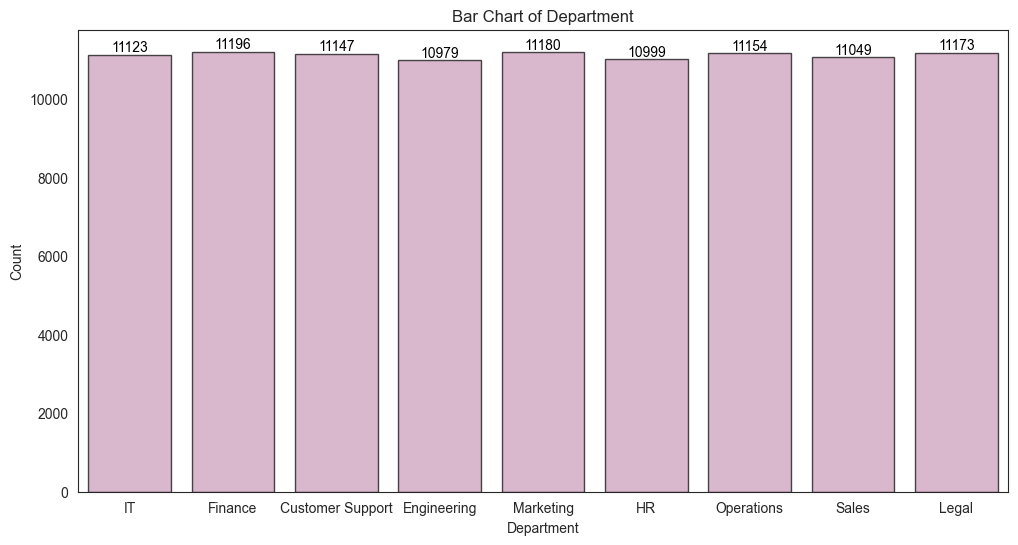

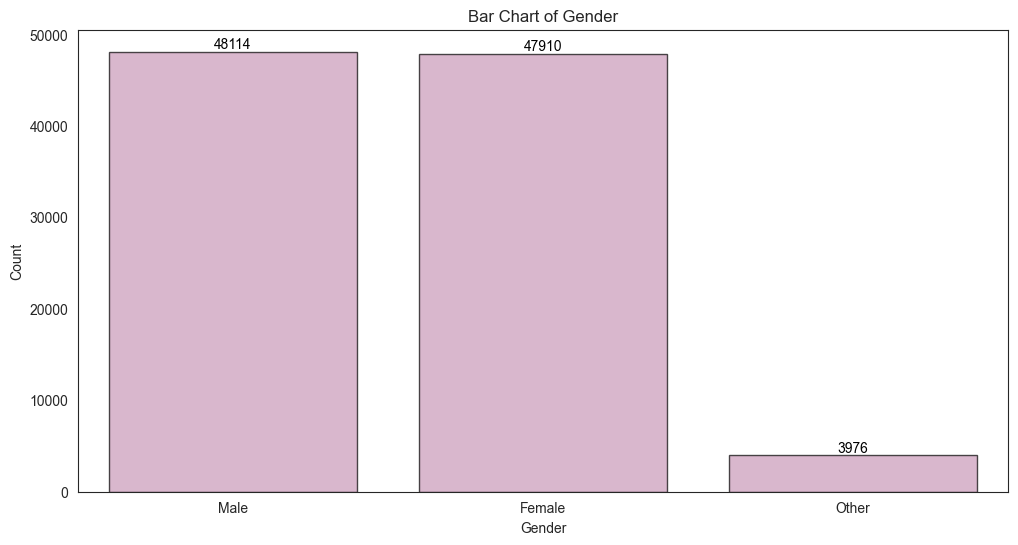

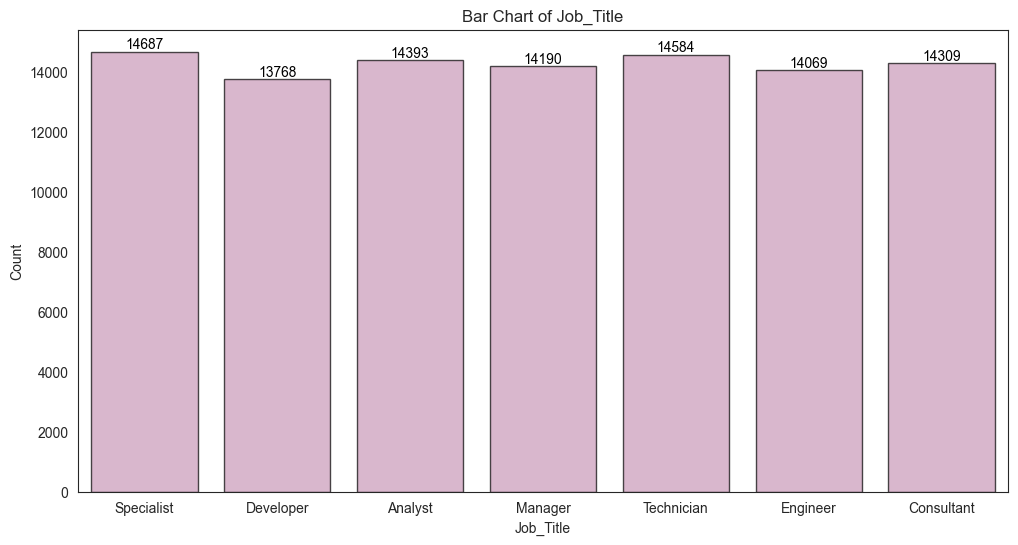

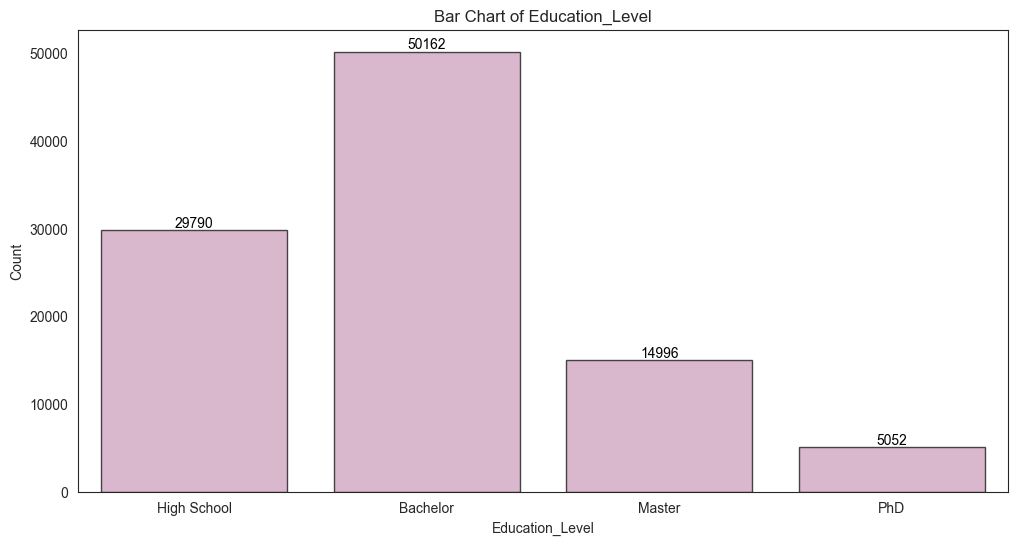

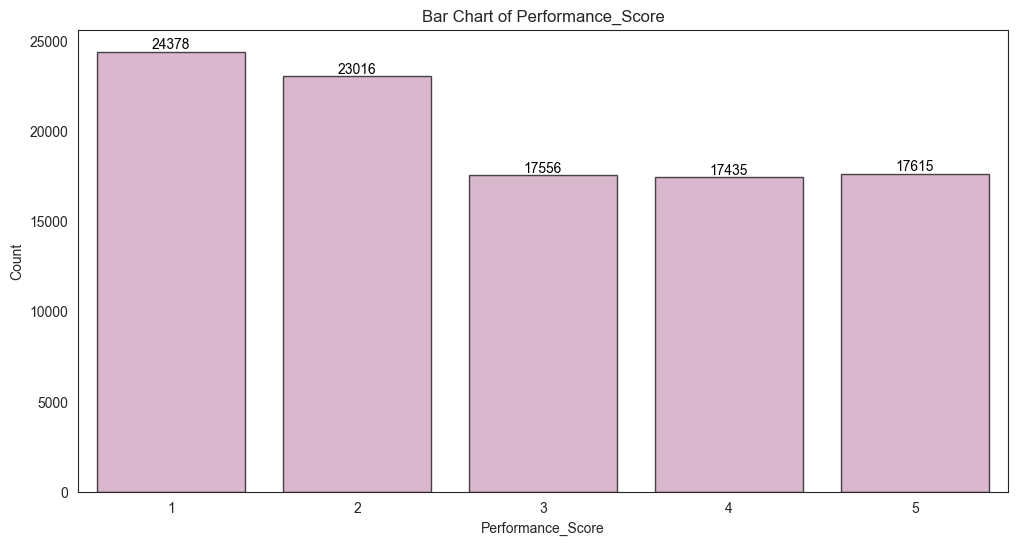

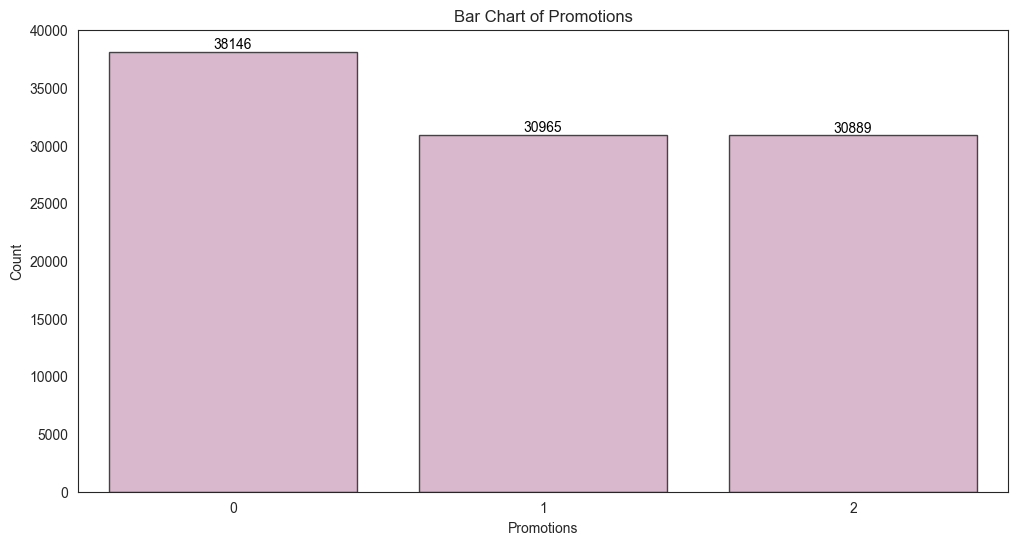

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['Department', 'Gender', 'Job_Title', 'Education_Level', 'Performance_Score', 'Promotions']

sns.set_style("white")  

for col in categorical_cols:
    plt.figure(figsize=(12, 6))  
    ax = sns.countplot(data=df, x=col, edgecolor="black", alpha=0.7, color="#D291BC")
    
    # Add count labels on top of bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black')

    plt.title(f"Bar Chart of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.grid(False) 
    plt.show()

#### 1.5 View Numerical Variables

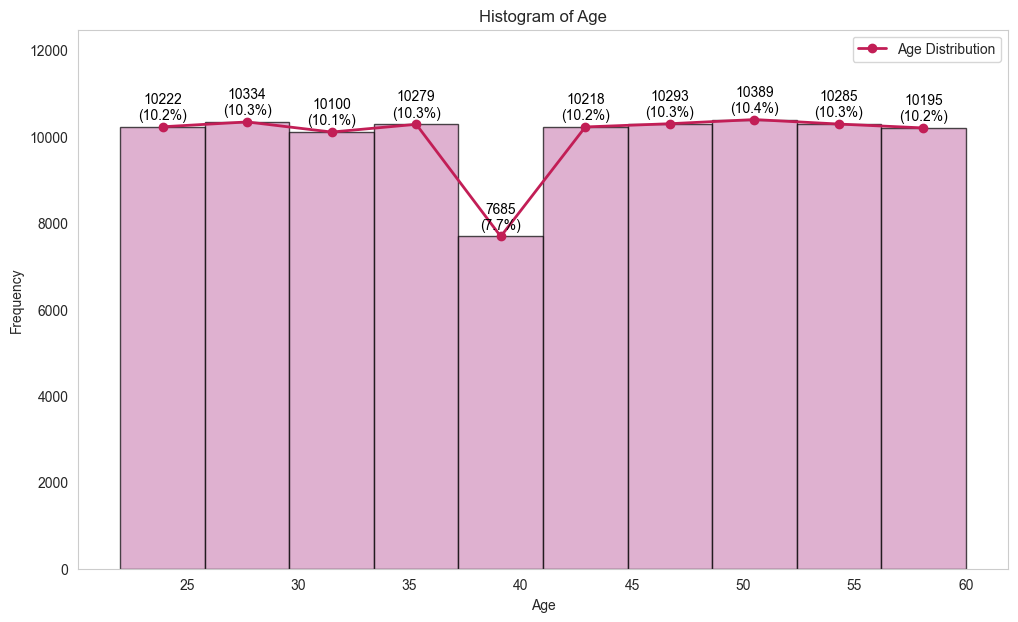

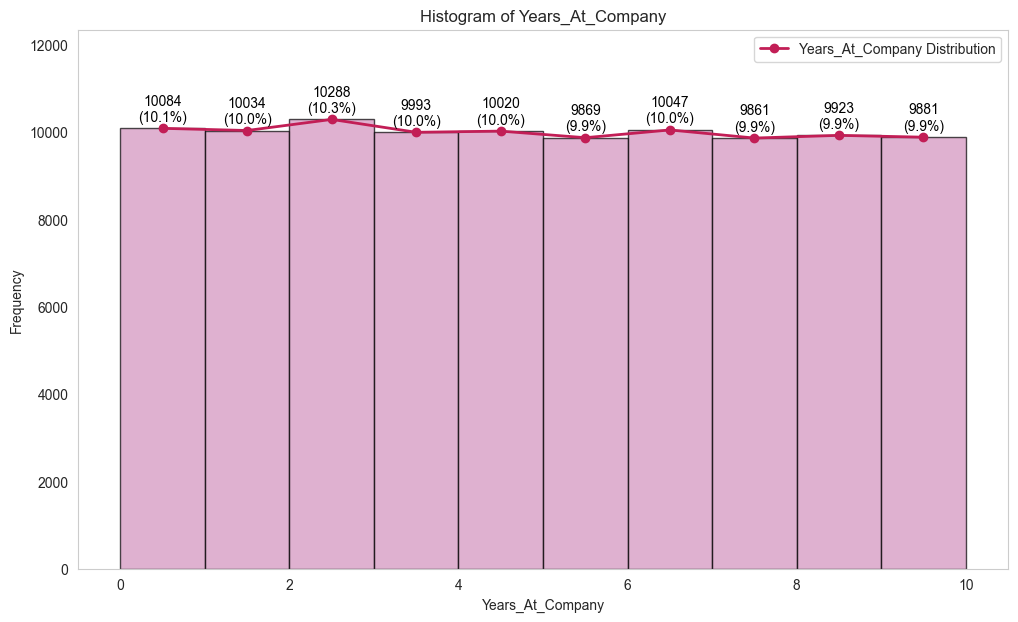

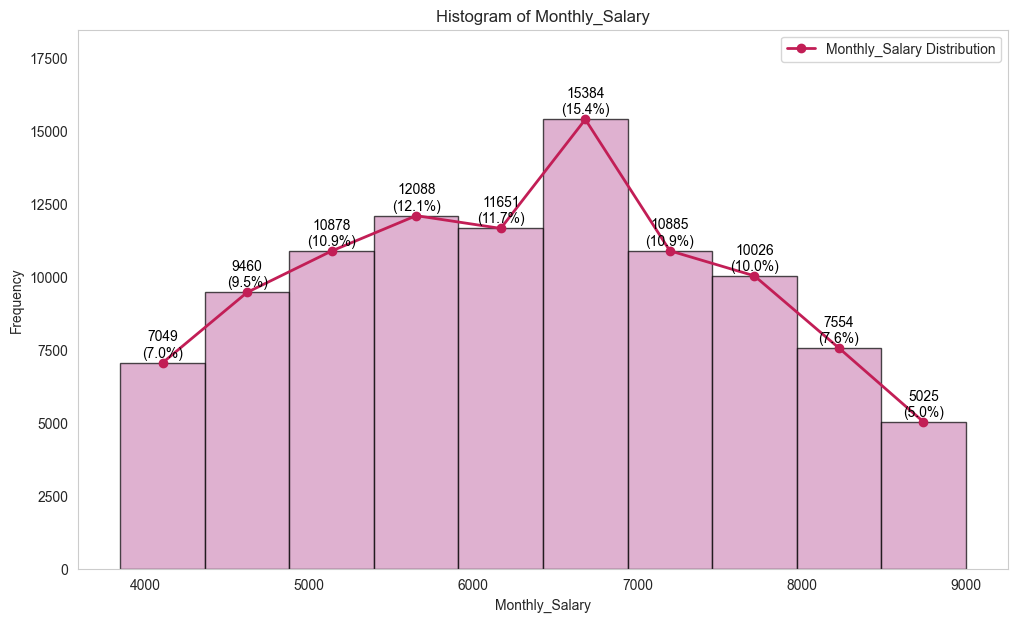

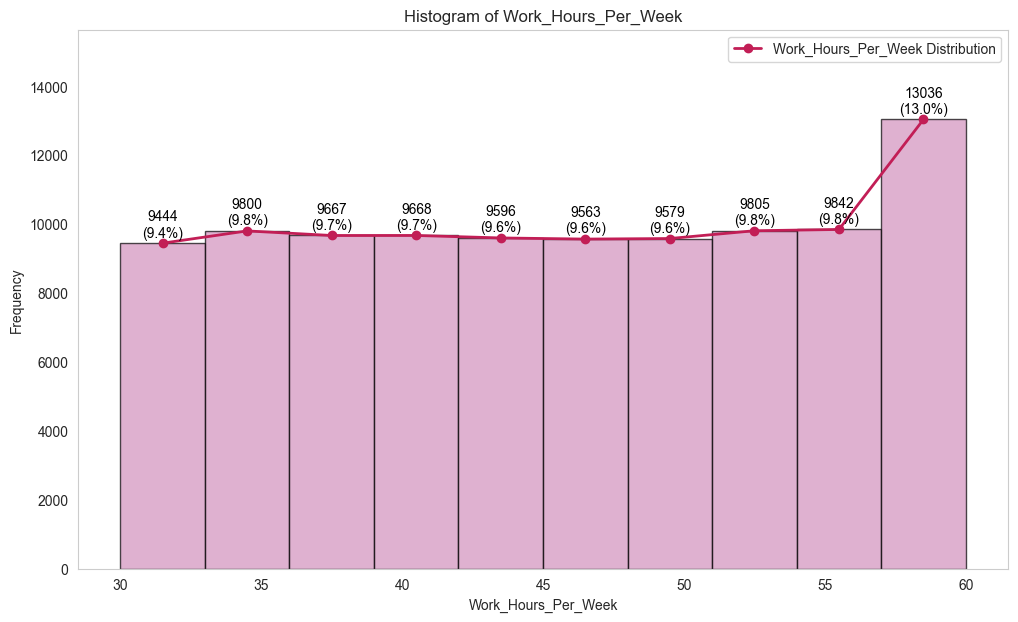

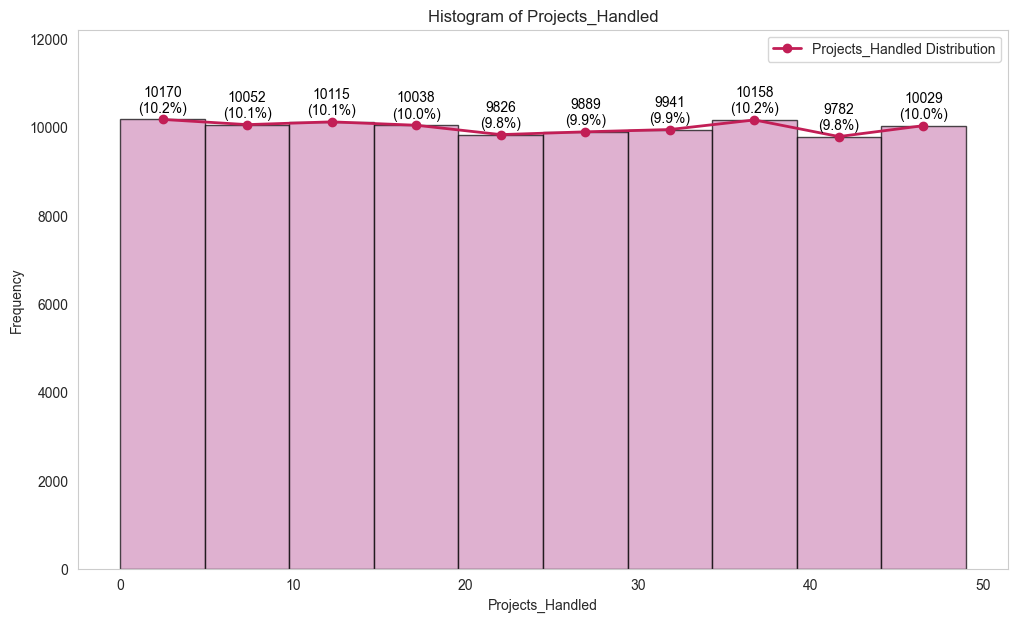

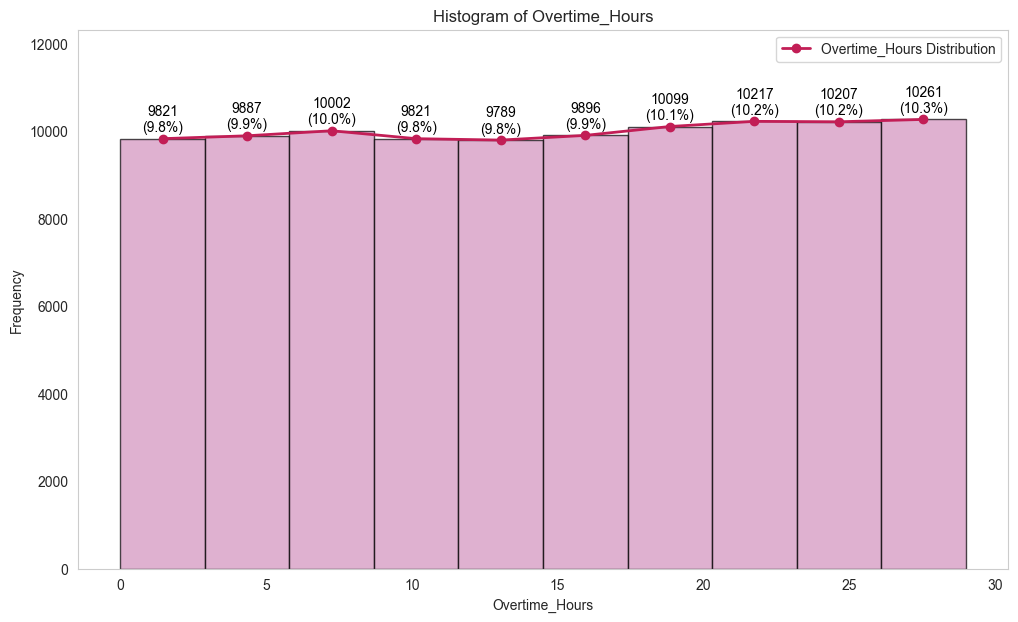

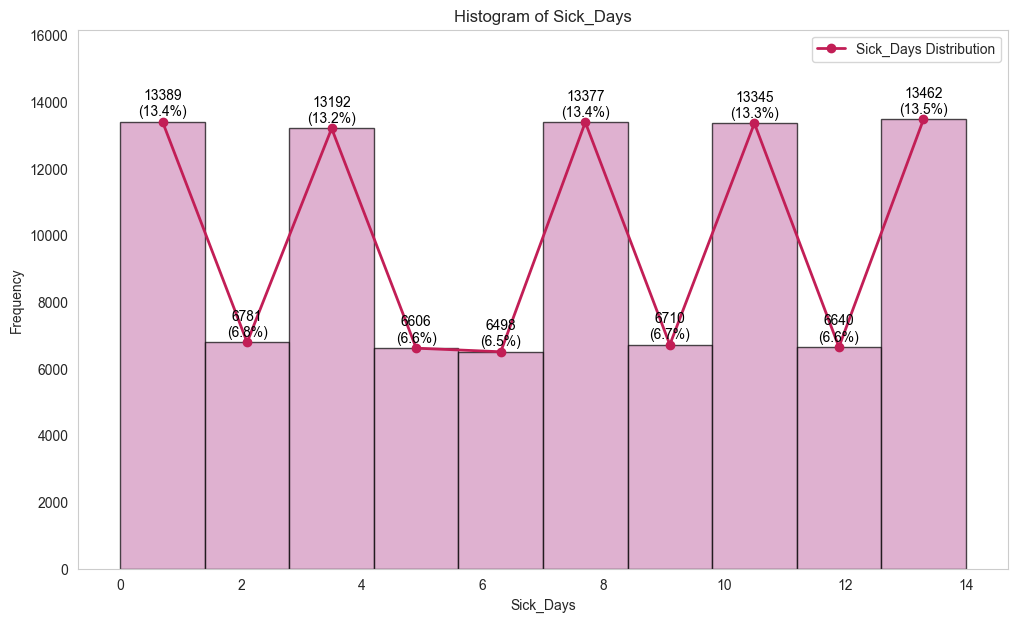

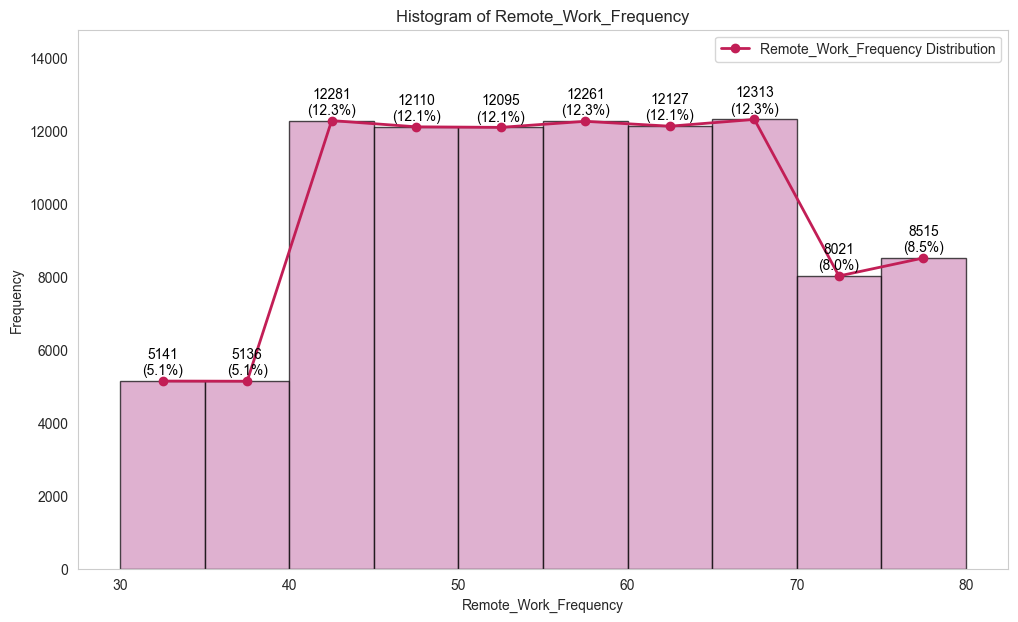

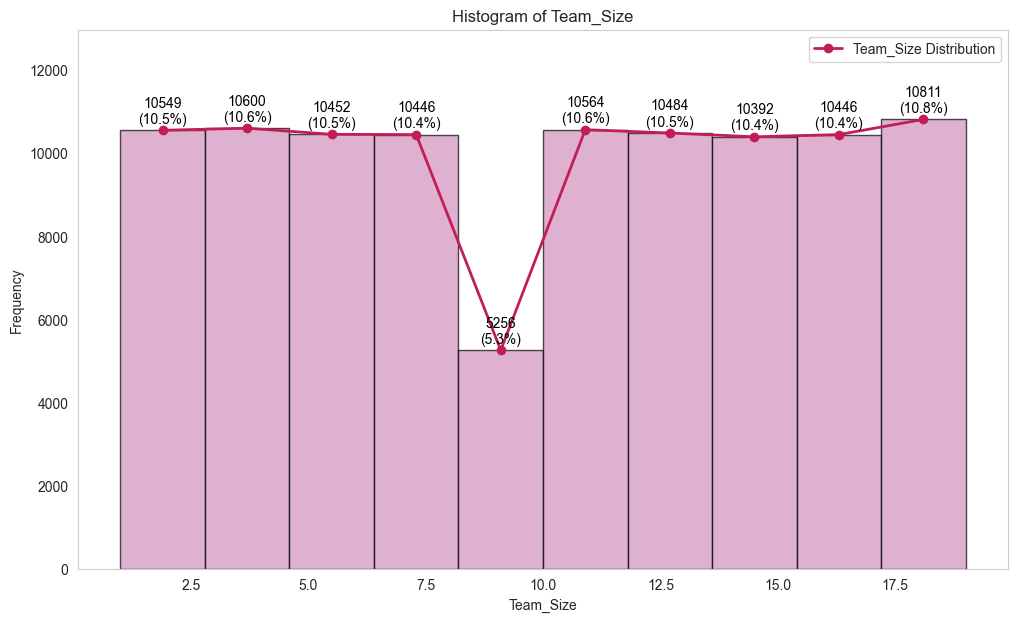

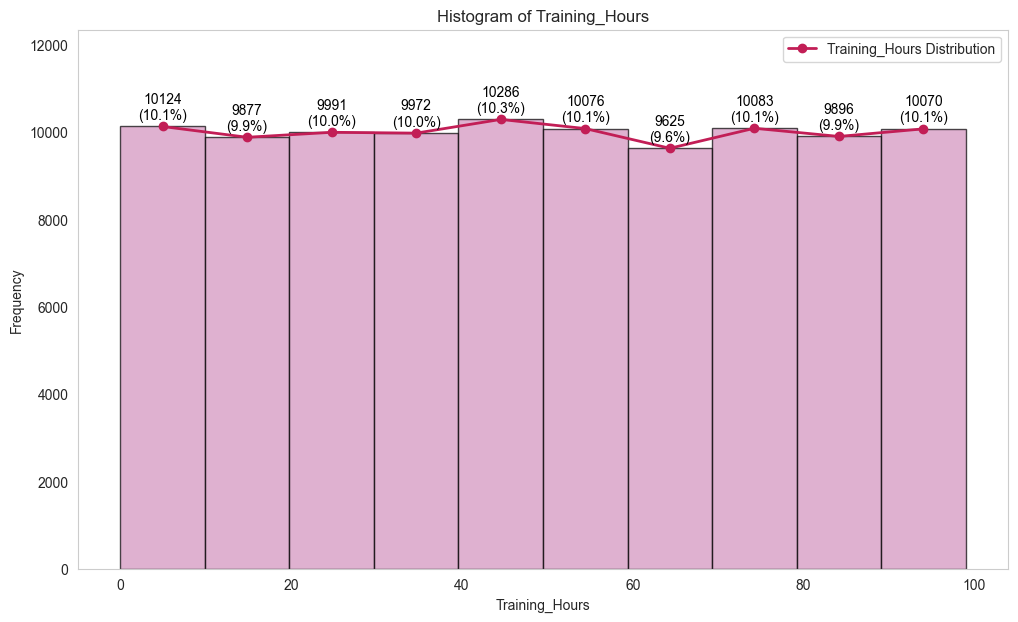

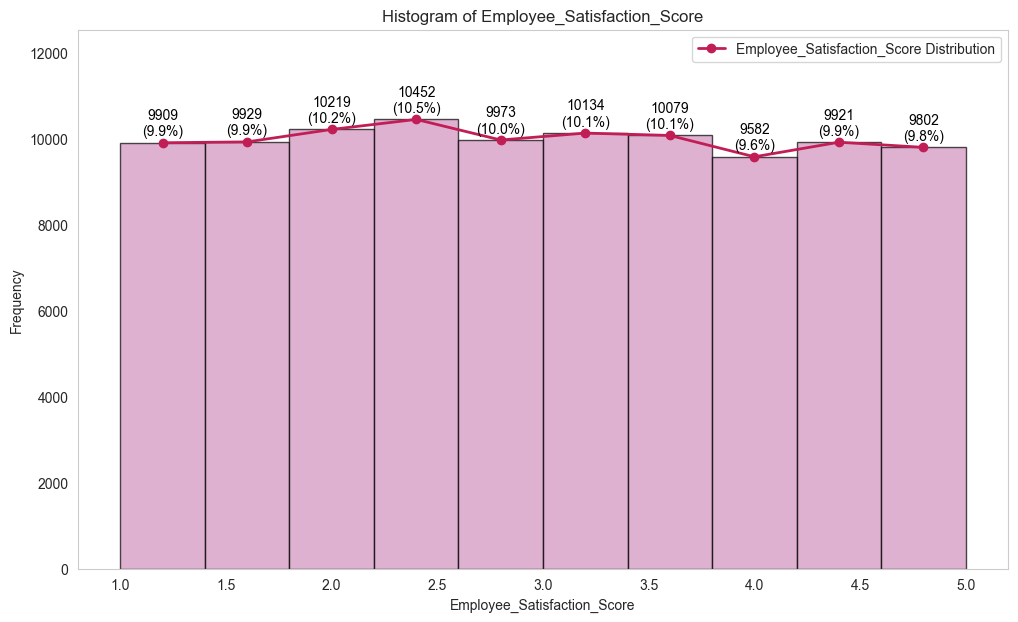

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = [
    'Age','Years_At_Company', 'Monthly_Salary', 'Work_Hours_Per_Week', 
    'Projects_Handled', 'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency',
    'Team_Size', 'Training_Hours', 'Employee_Satisfaction_Score'
]

sns.set_style("whitegrid")

for col in numerical_cols:
    plt.figure(figsize=(12, 7))

    counts, bins, patches = plt.hist(df[col], bins=10, edgecolor="black", alpha=0.7, color="#D291BC")
    bin_centers = (bins[:-1] + bins[1:]) / 2
    plt.plot(bin_centers, counts, marker="o", linestyle="-", color="#C21E56", label=f"{col} Distribution", linewidth=2)

    # Counts & percentages 
    total = counts.sum()
    for count, patch in zip(counts, patches):
        height = patch.get_height()
        if height > 0:
            plt.text(patch.get_x() + patch.get_width()/2, height + 100, 
                     f"{int(count)}\n({count/total:.1%})", 
                     ha="center", va="bottom", fontsize=10, color="black")

    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {col}")
    plt.legend()
    plt.ylim(0, max(counts) * 1.2)  
    plt.grid(False)  
    plt.show()


#### 1.4 Check Total Number of Resigned and Non-Resigned Employees 

Resigned
False    57422
True     42578
Total Employees: 100000


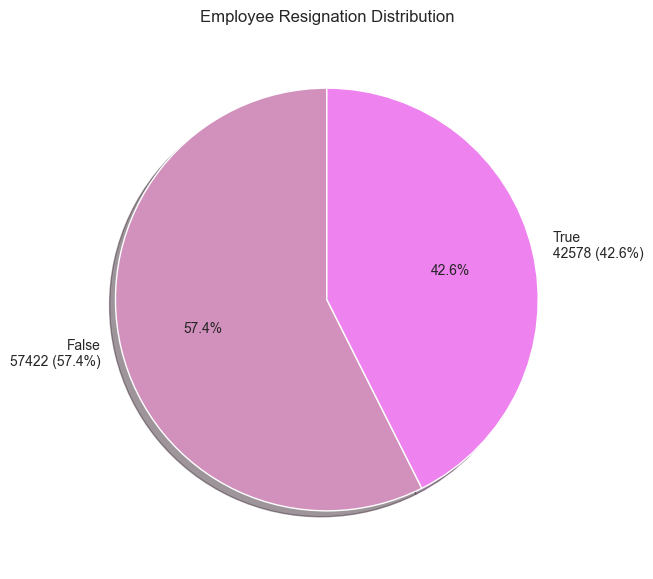

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of employees who resigned and did not resign
resigned_counts = df["Resigned"].value_counts()

# Counts and Percentages
labels = [f"{category}\n{count} ({count/sum(resigned_counts)*100:.1f}%)" for category, count in resigned_counts.items()]
plt.figure(figsize=(6, 7))
plt.pie(resigned_counts, labels=labels, autopct='%1.1f%%', 
        colors=["#D291BC", "#EE82EE"], startangle=90, shadow=True)
plt.title("Employee Resignation Distribution")
plt.axis('equal')

print(resigned_counts.to_string(index=True)) 
print(f"Total Employees: {resigned_counts.sum()}")

plt.show()


#### 1.5 Correlation Heatmap

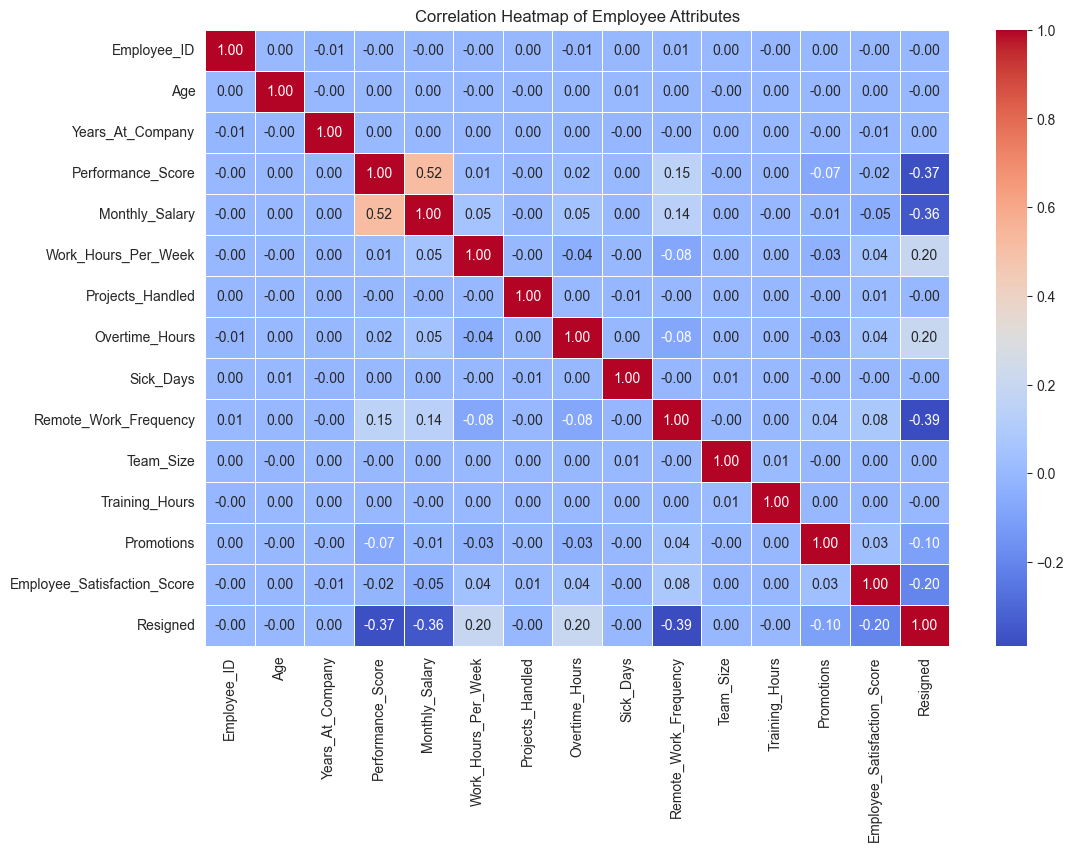

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Convert categorical to numerical
df["Resigned"] = df["Resigned"].astype(int)

numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Employee Attributes")
plt.show()


### 2.0 Data Preprocessing 


#### 2.1 Missing Values

In [9]:
missing_values = df.isnull().sum() 
print(missing_values)

Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Hire_Date                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64


#### 2. Check Outliers

##### 2.1 Outliers for Categorical Variables

Outliers in Department: None
Outliers in Gender: None
Outliers in Job_Title: None
Outliers in Education_Level: None
Outliers in Performance_Score: None
Outliers in Promotions: None


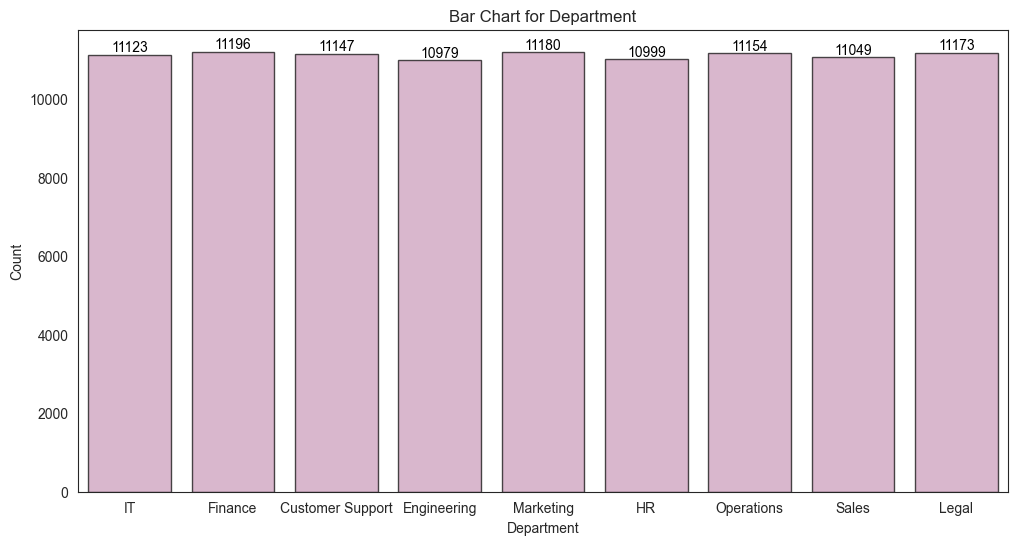

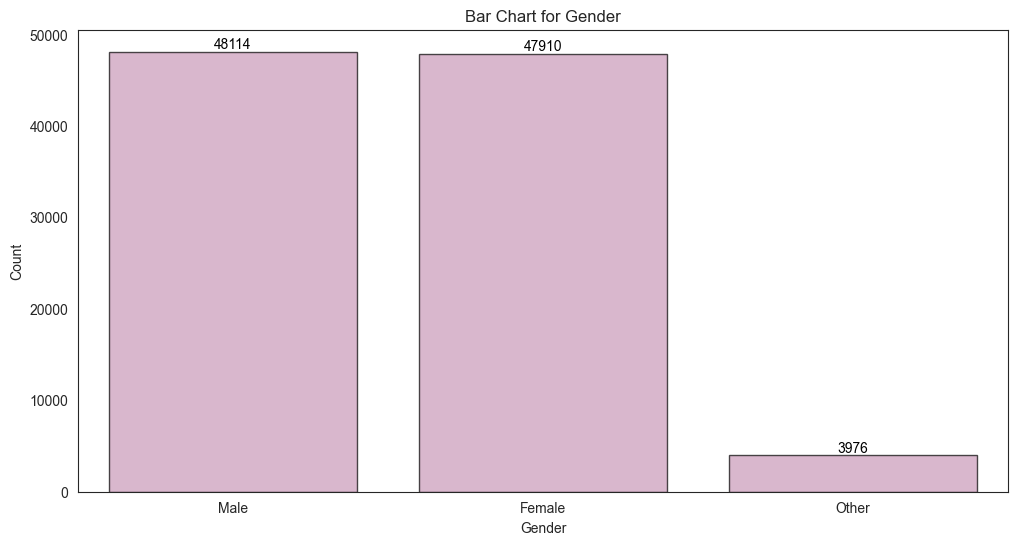

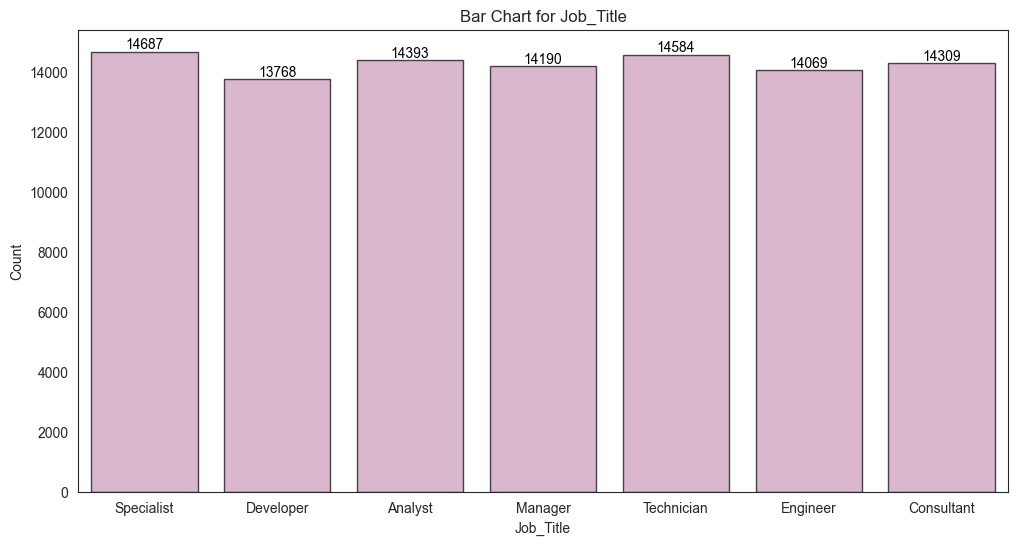

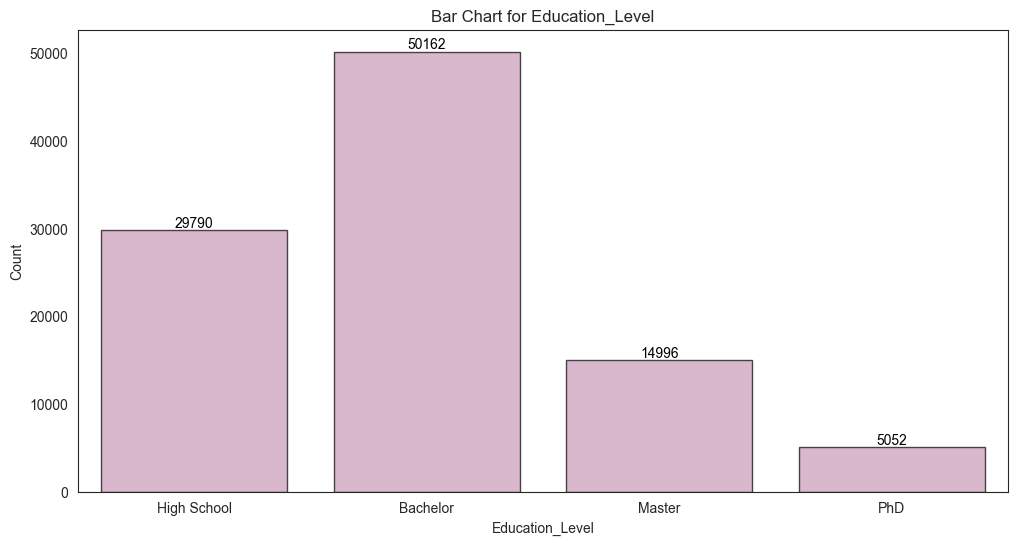

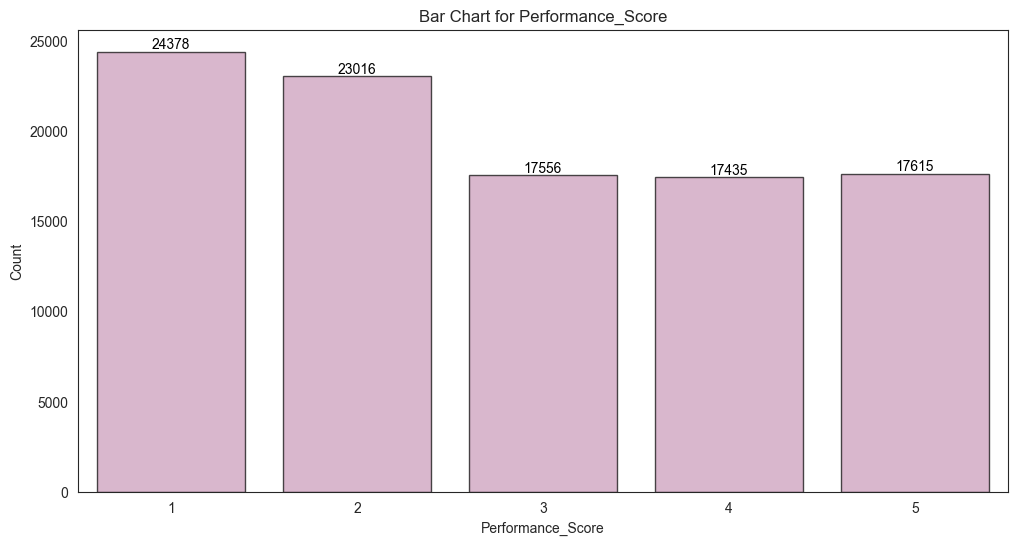

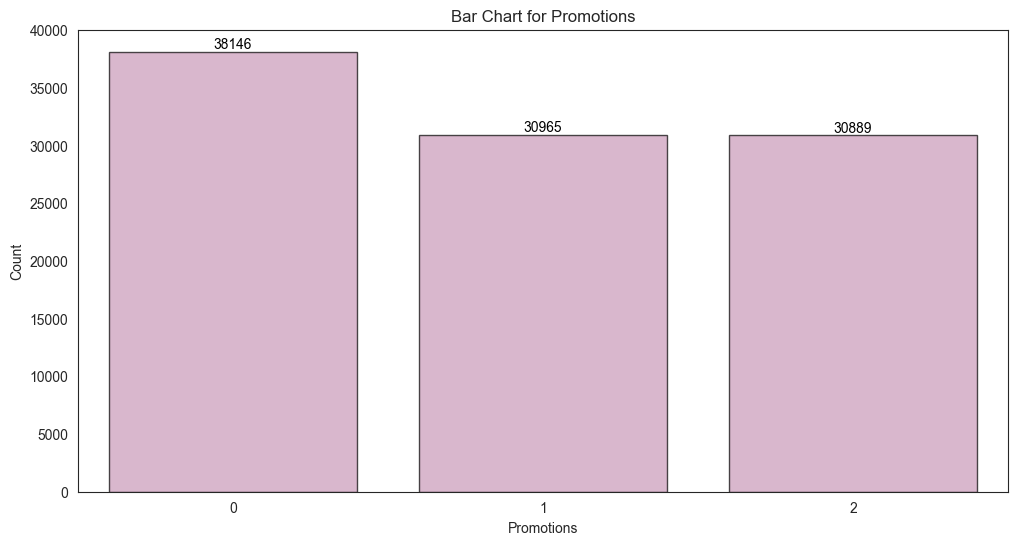

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

categorical_cols = ['Department', 'Gender', 'Job_Title', 'Education_Level', 'Performance_Score', 'Promotions']

sns.set_style("white")  

# Define outliers
threshold = 5

# Identify outliers
for col in categorical_cols:
    category_counts = df[col].value_counts()
    rare_categories = category_counts[category_counts < threshold].index.tolist()

    if rare_categories:
        print(f"Outliers in {col}: {rare_categories}")
    else:
        print(f"Outliers in {col}: None")

for col in categorical_cols:
    plt.figure(figsize=(12, 6))  
    ax = sns.countplot(data=df, x=col, edgecolor="black", alpha=0.7, color="#D291BC")
    
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black')

    plt.title(f"Bar Chart for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.grid(False) 
    plt.show()


##### 2.2 Outliers for Numerical Variables

C:\Users\Man Wei\AppData\Local\Temp\ipykernel_20504\1686192949.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Hire_Date'] = pd.to_datetime(df['Hire_Date'], errors='coerce')
c:\Users\Man Wei\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


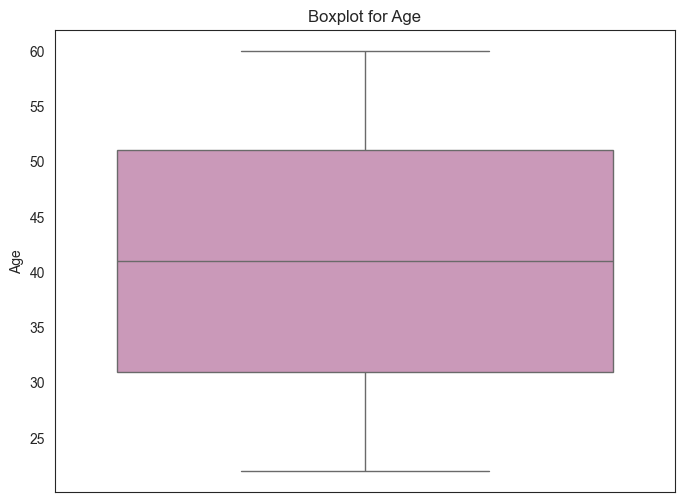

c:\Users\Man Wei\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


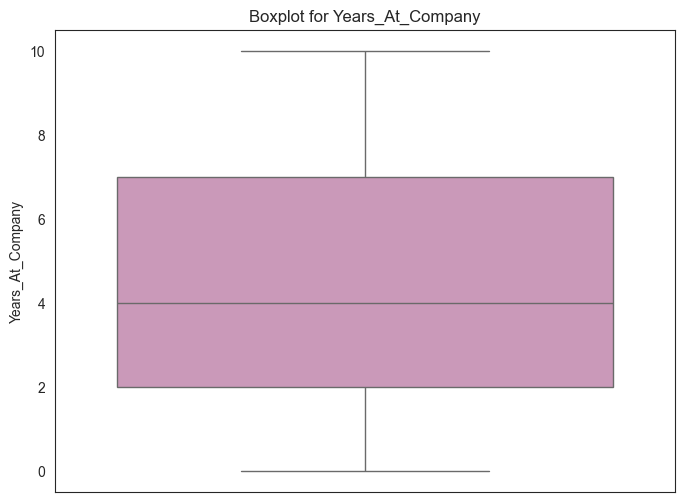

c:\Users\Man Wei\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


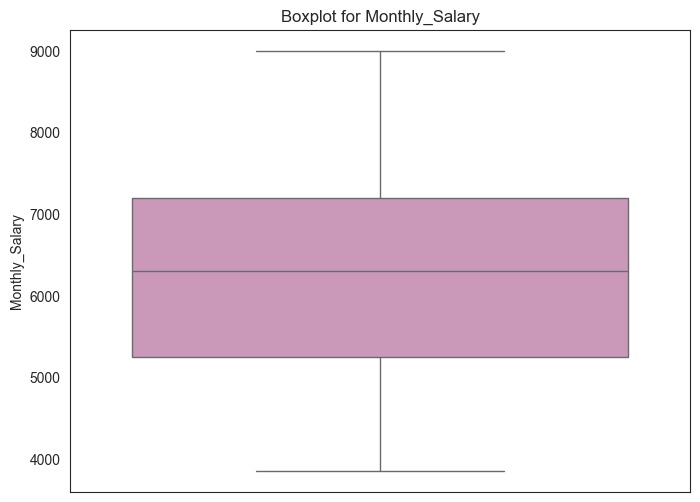

c:\Users\Man Wei\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


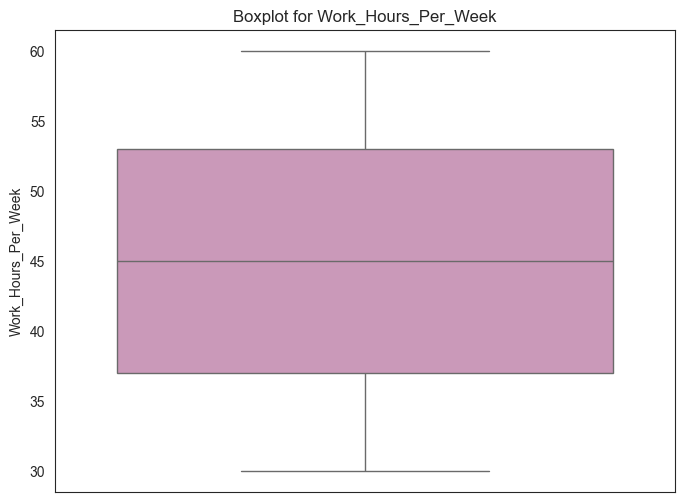

c:\Users\Man Wei\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


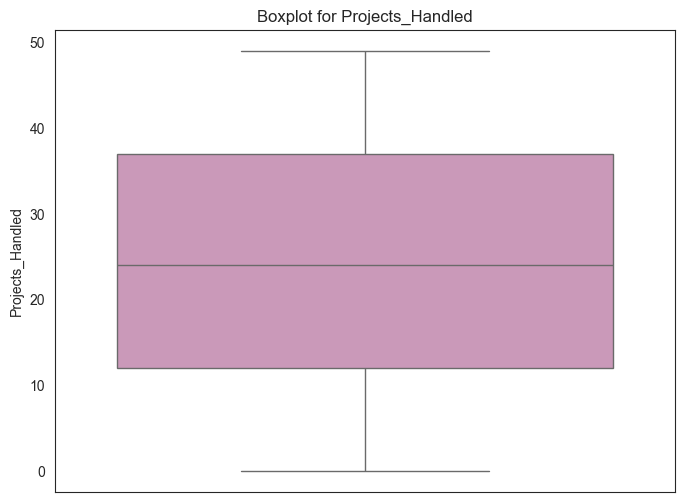

c:\Users\Man Wei\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


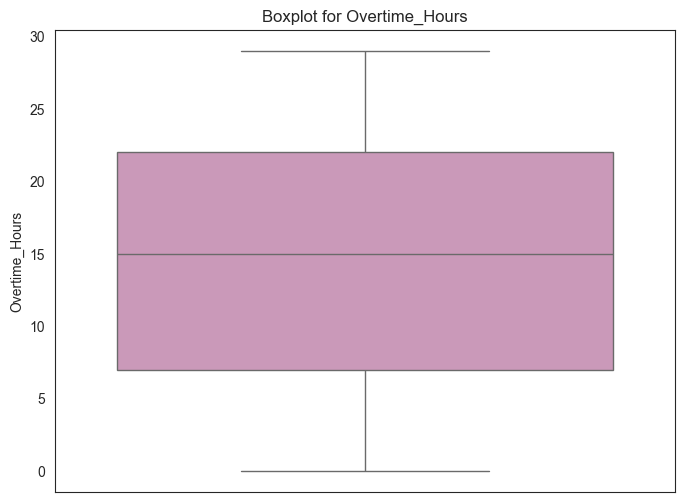

c:\Users\Man Wei\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


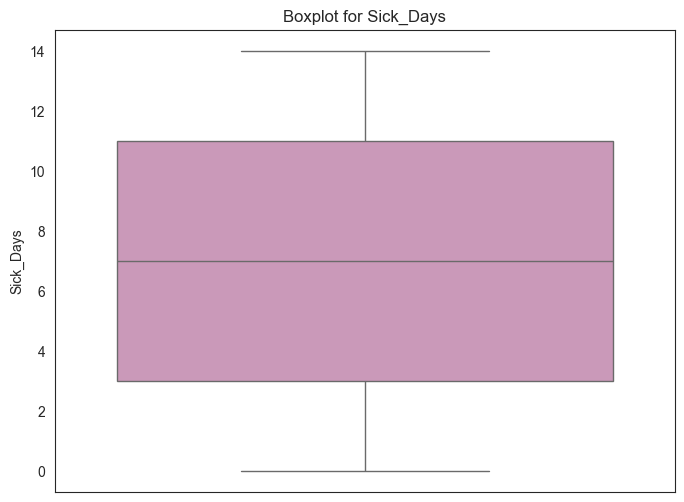

c:\Users\Man Wei\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


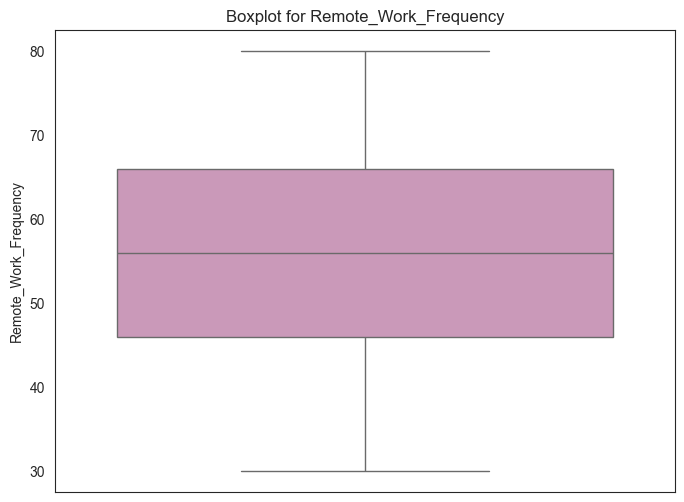

c:\Users\Man Wei\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


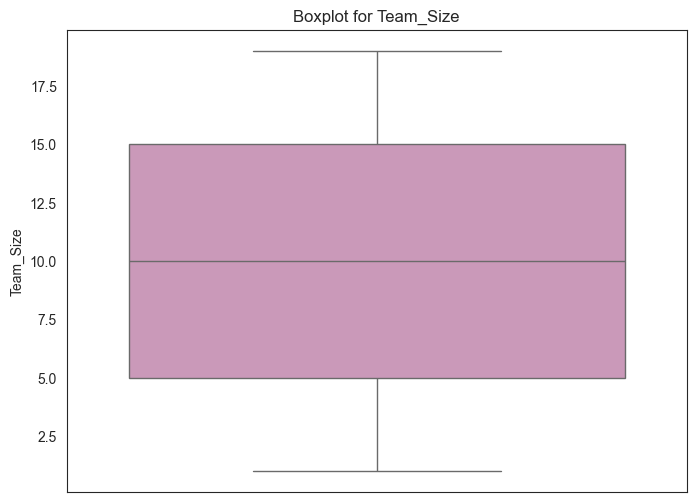

c:\Users\Man Wei\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


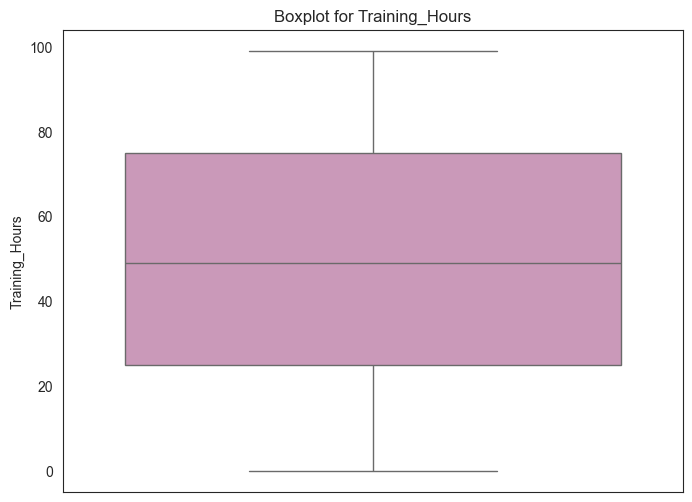

c:\Users\Man Wei\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


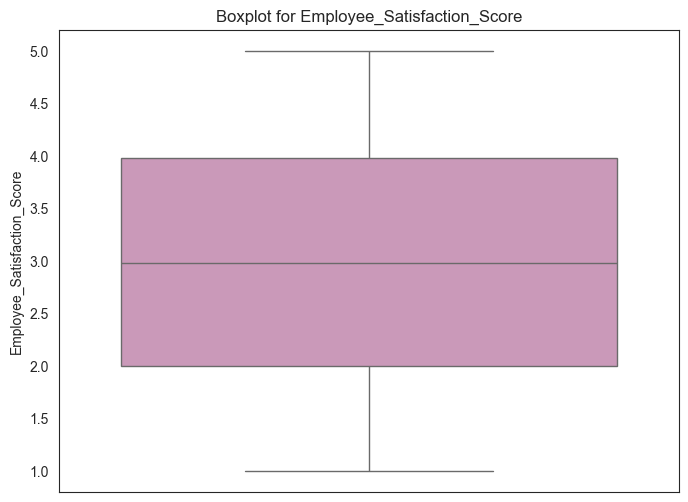

Outliers in Age: None
Outliers in Years_At_Company: None
Outliers in Monthly_Salary: None
Outliers in Work_Hours_Per_Week: None
Outliers in Projects_Handled: None
Outliers in Overtime_Hours: None
Outliers in Sick_Days: None
Outliers in Remote_Work_Frequency: None
Outliers in Team_Size: None
Outliers in Training_Hours: None
Outliers in Employee_Satisfaction_Score: None


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['Hire_Date'] = pd.to_datetime(df['Hire_Date'], errors='coerce')

numerical_columns = ['Age', 'Years_At_Company', 'Monthly_Salary', 
                     'Work_Hours_Per_Week', 'Projects_Handled', 
                     'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 
                     'Team_Size', 'Training_Hours' ,'Employee_Satisfaction_Score']

# IQR
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)    
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]
outlier_results = []

for col in numerical_columns:
    outliers = detect_outliers(df[col])
    if not outliers.empty:
        outlier_results.append(f"Outliers in {col}: {outliers.shape[0]}")
    else:
        outlier_results.append(f"Outliers in {col}: None")
    
    # Boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col], color="#D291BC", orient='h') 
    plt.title(f'Boxplot for {col}')
    plt.show()

for result in outlier_results:
    print(result)


### 3.0 Second part Data Preprocessing

#### 3.1 Data Transformation - Resigned

In [12]:
import pandas as pd
from tabulate import tabulate

df["Resigned"] = df["Resigned"].replace({'True': 1, 'False': 0}).astype(int)

random_rows = df[["Employee_ID", "Resigned"]].sample(n=10)

print("\n [Resigned] - 10 random rows printed\n")
print(tabulate(random_rows, headers="keys", tablefmt="pretty", showindex=False))



 [Resigned] - 10 random rows printed

+-------------+----------+
| Employee_ID | Resigned |
+-------------+----------+
|    28882    |    1     |
|    15461    |    0     |
|    35129    |    0     |
|    76551    |    1     |
|    36151    |    1     |
|    95797    |    0     |
|     962     |    0     |
|    92484    |    0     |
|    95948    |    0     |
|    17677    |    1     |
+-------------+----------+


#### 3.2 Feature Engineering

##### Hired Date seperate into year and month into Tenure_Years

In [13]:
import pandas as pd
from tabulate import tabulate
from dateutil.relativedelta import relativedelta

df['Hire_Date'] = pd.to_datetime(df['Hire_Date']).dt.date
df['Hire_Year'] = pd.to_datetime(df['Hire_Date']).dt.year
df['Hire_Month'] = pd.to_datetime(df['Hire_Date']).dt.month

# Calculate Tenure in years from today's date 
df['Tenure_Years'] = df['Hire_Date'].apply(lambda d: round(
    relativedelta(pd.to_datetime('today').date(), d).years + 
    relativedelta(pd.to_datetime('today').date(), d).months / 12, 2
))

random_rows = df[['Employee_ID', 'Hire_Date', 'Hire_Year', 'Hire_Month', 'Tenure_Years']].sample(n=10)
random_rows_reset = random_rows.reset_index(drop=True)

print(tabulate(random_rows_reset, headers="keys", tablefmt="pretty"))

# After showing drop hire date and years at company
df = df.drop(columns=['Hire_Date', 'Years_At_Company'], errors='ignore')

+---+-------------+------------+-----------+------------+--------------+
|   | Employee_ID | Hire_Date  | Hire_Year | Hire_Month | Tenure_Years |
+---+-------------+------------+-----------+------------+--------------+
| 0 |    57187    | 2016-03-09 |   2016    |     3      |     9.33     |
| 1 |    88684    | 2018-06-09 |   2018    |     6      |     7.08     |
| 2 |    90672    | 2020-08-08 |   2020    |     8      |     4.92     |
| 3 |    6297     | 2020-12-03 |   2020    |     12     |     4.58     |
| 4 |    52656    | 2024-06-26 |   2024    |     6      |     1.0      |
| 5 |    52367    | 2018-08-28 |   2018    |     8      |     6.83     |
| 6 |    4076     | 2019-05-22 |   2019    |     5      |     6.08     |
| 7 |    42206    | 2022-12-16 |   2022    |     12     |     2.5      |
| 8 |    39478    | 2016-07-04 |   2016    |     7      |     9.0      |
| 9 |    14481    | 2022-07-10 |   2022    |     7      |     3.0      |
+---+-------------+------------+-----------+-------

##### Health Index , Drop and Show Current Columns 

In [ ]:
from dateutil.relativedelta import relativedelta
import pandas as pd
from tabulate import tabulate

# Health Index Calculation
max_lost_hours = (df['Sick_Days'] * (df['Work_Hours_Per_Week'] / 5)).max()
df['Health_Index'] = round((df['Sick_Days'] * (df['Work_Hours_Per_Week'] / 5)) / max_lost_hours, 2)

# Remote Work Level Categorization
df['Remote_Work_Level'] = pd.cut(df['qRemote_Work_Freuency'],
                                bins=[29, 47, 64, 80],
                                labels=['Low', 'Medium', 'High'],
                                include_lowest=True)

# Drop unnecessary columns
columns_to_drop = ['Remote_Work_Frequency', 'Gender']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')

# --- Data Formatting ---
df = df.round(2)

# --- Output Verification ---
print(tabulate(df[['Tenure_Years', 'Health_Index']].head(), headers="keys", tablefmt="pretty"))
print("\nColumns in the DataFrame after feature engineering:\n")
print(df.columns)

+---+--------------+--------------+
|   | Tenure_Years | Health_Index |
+---+--------------+--------------+
| 0 |     3.42     |     0.08     |
| 1 |     1.17     |     0.57     |
| 2 |     9.67     |     0.74     |
| 3 |     8.67     |     0.59     |
| 4 |     3.92     |     0.0      |
+---+--------------+--------------+

Columns in the DataFrame after feature engineering:

Index(['Employee_ID', 'Department', 'Age', 'Job_Title', 'Education_Level',
       'Performance_Score', 'Monthly_Salary', 'Work_Hours_Per_Week',
       'Projects_Handled', 'Overtime_Hours', 'Sick_Days', 'Team_Size',
       'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score',
       'Resigned', 'Hire_Year', 'Hire_Month', 'Tenure_Years', 'Health_Index',
       'Remote_Work_Level'],
      dtype='object')


##### Check New Variables

In [15]:
df[['Health_Index', 'Tenure_Years']].describe()

,Health_Index,Tenure_Years
count,100000.000000,100000.000000
mean,0.375632,5.787549
std,0.247847,2.882058
min,0.000000,0.830000
25%,0.170000,3.250000
50%,0.360000,5.750000
75%,0.560000,8.250000
max,1.000000,10.830000


##### Distribution for health index and tenure years

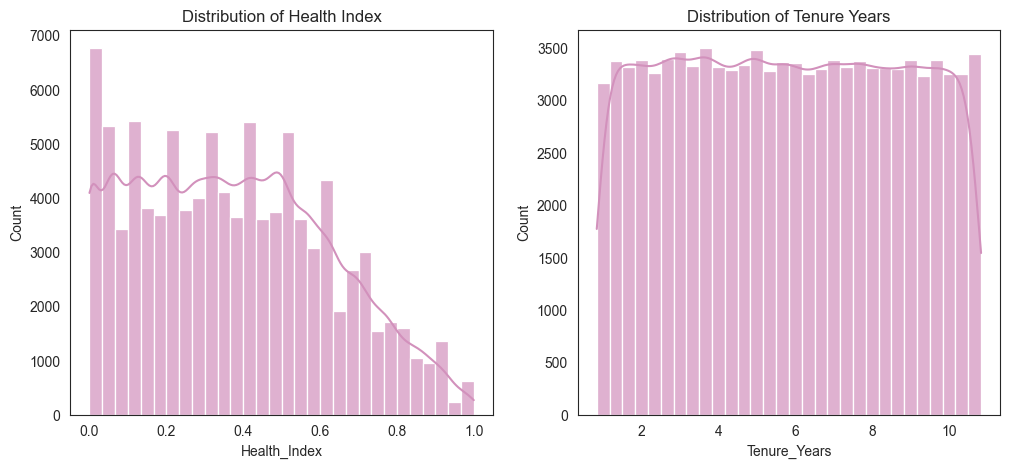

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Health_Index
sns.histplot(df['Health_Index'], kde=True, bins=30, ax=axes[0], alpha=0.7, color="#D291BC") 
axes[0].set_title('Distribution of Health Index')

# Tenure_Years
sns.histplot(df['Tenure_Years'], kde=True, bins=30, ax=axes[1], alpha=0.7, color="#D291BC") 
axes[1].set_title('Distribution of Tenure Years')

plt.show()

##### Encoding

In [17]:
import pandas as pd
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder

# One-Hot Encoding for Department and Job_Title
df_encoded = pd.get_dummies(df, columns=['Department', 'Job_Title'], drop_first=True)

# Ordinal Encoding for Education_Level
education_order = ['High School', 'Bachelor', 'Master', 'PhD']
df_encoded['Education_Level'] = pd.Categorical(df_encoded['Education_Level'], categories=education_order, ordered=True)
df_encoded['Education_Level'] = df_encoded['Education_Level'].cat.codes

# Ordinal Encoding for Remote_Work_Level
df_encoded['Remote_Work_Level'] = pd.Categorical(df_encoded['Remote_Work_Level'], categories=['Low', 'Medium', 'High'], ordered=True)
df_encoded['Remote_Work_Level'] = df_encoded['Remote_Work_Level'].cat.codes

# Treat 'Promotions' and 'Performance_Score' as categorical
df_encoded['Promotions'] = df_encoded['Promotions'].astype('category')
df_encoded['Performance_Score'] = df_encoded['Performance_Score'].astype('category')

# Select columns to display
selected_columns = ['Employee_ID', 'Education_Level', 'Remote_Work_Level']

print("Employee_ID, Education_Level, Remote_Work_Level (First 5 rows):")
print(tabulate(df_encoded[selected_columns].head(), headers="keys", tablefmt="pretty"))

# One-Hot Encoded Department and Job_Title
print("\nOne-Hot Encoded Department and Job_Title (First 5 rows):")
print(tabulate(df_encoded[df_encoded.columns[df_encoded.columns.str.startswith('Department') | 
                                              df_encoded.columns.str.startswith('Job_Title')]].head(), headers="keys", tablefmt="pretty"))


Employee_ID, Education_Level, Remote_Work_Level (First 5 rows):
+---+-------------+-----------------+-------------------+
|   | Employee_ID | Education_Level | Remote_Work_Level |
+---+-------------+-----------------+-------------------+
| 0 |      1      |        0        |         1         |
| 1 |      2      |        0        |         0         |
| 2 |      4      |        1        |         2         |
| 3 |      5      |        1        |         1         |
| 4 |      6      |        0        |         2         |
+---+-------------+-----------------+-------------------+

One-Hot Encoded Department and Job_Title (First 5 rows):
+---+------------------------+--------------------+---------------+---------------+------------------+----------------------+-----------------------+------------------+----------------------+---------------------+--------------------+-------------------+----------------------+----------------------+
|   | Department_Engineering | Department_Finance | Dep

#### Check data types after conversion

In [18]:
# Check the data types after conversion
print(df_encoded.dtypes)

Employee_ID                       int64
Age                               int64
Education_Level                    int8
Performance_Score              category
Monthly_Salary                    int64
Work_Hours_Per_Week               int64
Projects_Handled                  int64
Overtime_Hours                    int64
Sick_Days                         int64
Team_Size                         int64
Training_Hours                    int64
Promotions                     category
Employee_Satisfaction_Score     float64
Resigned                          int64
Hire_Year                         int32
Hire_Month                        int32
Tenure_Years                    float64
Health_Index                    float64
Remote_Work_Level                  int8
Department_Engineering             bool
Department_Finance                 bool
Department_HR                      bool
Department_IT                      bool
Department_Legal                   bool
Department_Marketing               bool


### 4.0 Data Understanding after Data Preprocessing

#### 4.1 Visualiation

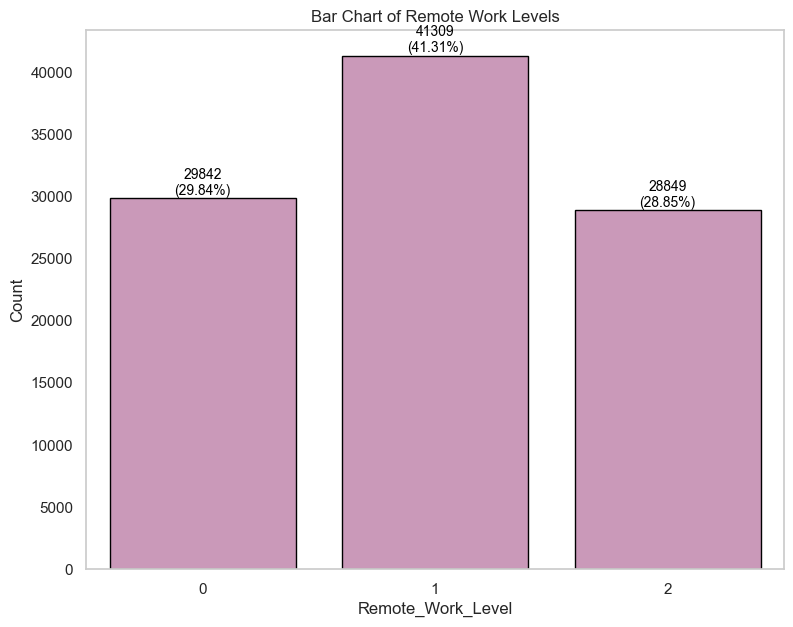

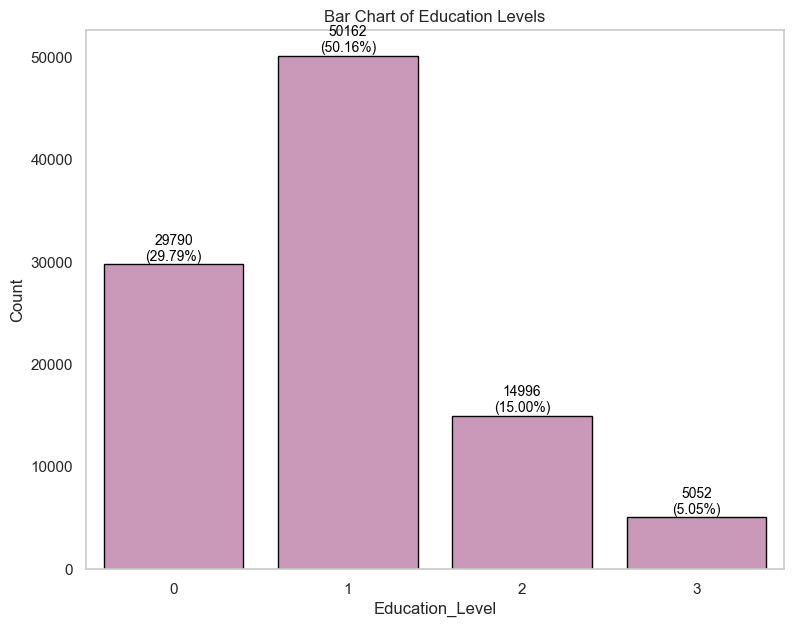

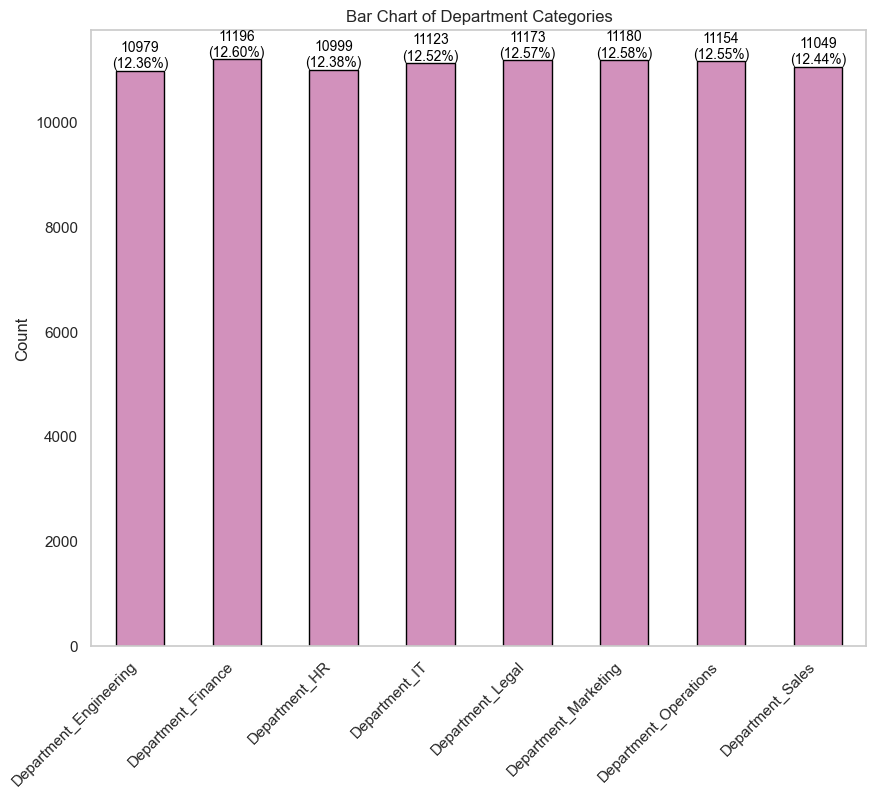

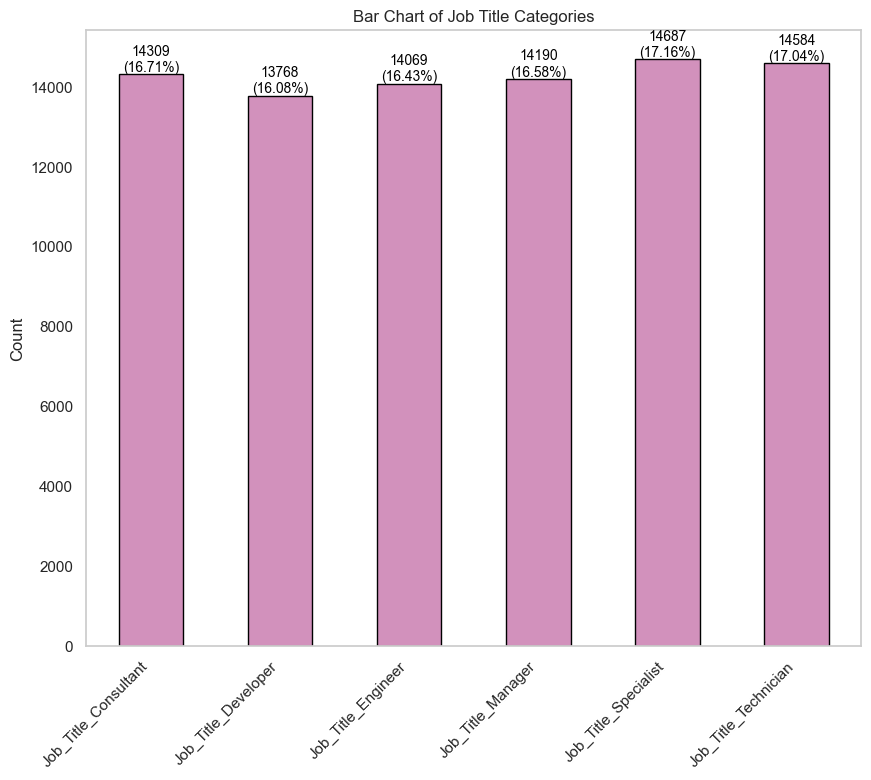

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
bar_color = "#D291BC"

# Remote Work Levels
plt.figure(figsize=(9, 7))
ax = sns.countplot(x='Remote_Work_Level', data=df_encoded, color=bar_color, edgecolor="black")
remote_counts = df_encoded['Remote_Work_Level'].value_counts()
total_remote = remote_counts.sum()

for p in ax.patches:
    x = p.get_x() + p.get_width() / 2  
    y = p.get_height()
    percentage = (y / total_remote) * 100
    ax.annotate(f'{int(y)}\n({percentage:.2f}%)', (x, y + 50), ha='center', va='bottom', fontsize=10, color='black')

plt.title('Bar Chart of Remote Work Levels')
plt.ylabel('Count')
plt.grid(False)
plt.show()

# Education Levels
plt.figure(figsize=(9, 7))
ax = sns.countplot(x='Education_Level', data=df_encoded, color=bar_color, edgecolor="black")
education_counts = df_encoded['Education_Level'].value_counts()
total_education = education_counts.sum()

for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    percentage = (y / total_education) * 100
    ax.annotate(f'{int(y)}\n({percentage:.2f}%)', (x, y + 50), ha='center', va='bottom', fontsize=10, color='black')

plt.title('Bar Chart of Education Levels')
plt.ylabel('Count')
plt.grid(False)
plt.show()

# Department
plt.figure(figsize=(10, 8))  
department_columns = [col for col in df_encoded.columns if col.startswith('Department')]  
department_counts = df_encoded[department_columns].sum()
total_department = department_counts.sum()
ax = department_counts.plot(kind='bar', color=bar_color, edgecolor="black")

for i, count in enumerate(department_counts):
    percentage = (count / total_department) * 100
    plt.text(i, count + 0.05, f'{count}\n({percentage:.2f}%)', ha='center', va='bottom', fontsize=10, color='black')

plt.title('Bar Chart of Department Categories')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right") 
plt.grid(False)
plt.show()

# Job Title
plt.figure(figsize=(10, 8))  
job_title_columns = [col for col in df_encoded.columns if col.startswith('Job_Title')]  
job_title_counts = df_encoded[job_title_columns].sum()
total_job_title = job_title_counts.sum()
ax = job_title_counts.plot(kind='bar', color=bar_color, edgecolor="black")

for i, count in enumerate(job_title_counts):
    percentage = (count / total_job_title) * 100
    plt.text(i, count + 0.05, f'{count}\n({percentage:.2f}%)', ha='center', va='bottom', fontsize=10, color='black')

plt.title('Bar Chart of Job Title Categories')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right") 
plt.grid(False)
plt.show()


### 5.0 Feature Selection

#### Numerical


 Numerical Features - Mutual Information: 

                       Variable  MI Score
1                Monthly_Salary  0.114147
2           Work_Hours_Per_Week  0.028581
3                Overtime_Hours  0.028300
4   Employee_Satisfaction_Score  0.025819
5                  Health_Index  0.004403
6                     Team_Size  0.001157
7                     Sick_Days  0.000263
8              Projects_Handled  0.000135
9                           Age  0.000000
10               Training_Hours  0.000000
11                 Tenure_Years  0.000000
Top 5 Variables with threshold 0.001: ['Monthly_Salary', 'Work_Hours_Per_Week', 'Overtime_Hours', 'Employee_Satisfaction_Score', 'Health_Index', 'Team_Size']
Top 5 Variables with threshold 0.005: ['Monthly_Salary', 'Work_Hours_Per_Week', 'Overtime_Hours', 'Employee_Satisfaction_Score']


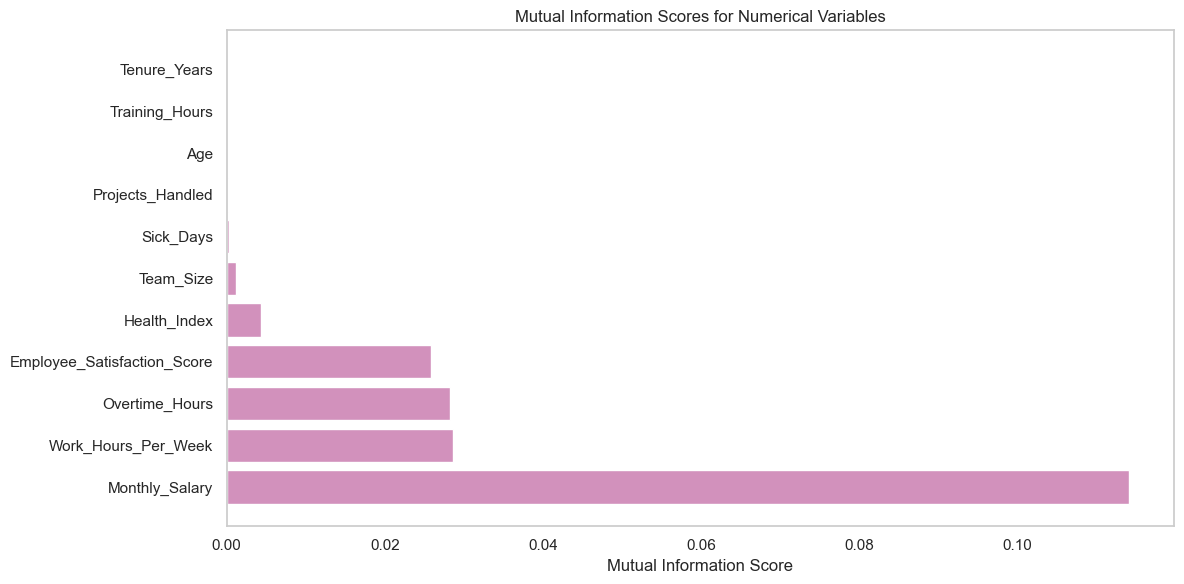

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

# Select the numerical columns (excluding certain columns from the list)
numerical_columns = [col for col in df.select_dtypes(include=['int64', 'float64']).columns 
                     if col not in ['Promotions', 'Performance_Score', 'Remote_Work_Level', 'Employee_ID', 'Resigned']]

# Define X as features and y as target variable 
X_mi = df[numerical_columns] 
y = df['Resigned']  

# Calculate mutual information
mi_numerical = mutual_info_classif(X_mi, y, random_state=42)

# Create DataFrame to store MI scores
print("\n Numerical Features - Mutual Information: \n")
mi_df = pd.DataFrame({'Variable': X_mi.columns, 'MI Score': mi_numerical}).sort_values(by='MI Score', ascending=False)

# Reset index and start from 1
mi_df.reset_index(drop=True, inplace=True)
mi_df.index = mi_df.index + 1  

# Print MI DataFrame without the old index
print(mi_df)

# Different thresholds to see the impact on selected features
thresholds = [0.001, 0.005]
for threshold in thresholds:
    selected_variable = mi_df[mi_df['MI Score'] > threshold]['Variable'].tolist()
    print(f"Top 5 Variables with threshold {threshold}: {selected_variable}")

# Plotting the mutual information scores
plt.figure(figsize=(12, 6))
plt.barh(mi_df['Variable'], mi_df['MI Score'], color="#D291BC")
plt.xlabel('Mutual Information Score')
plt.title('Mutual Information Scores for Numerical Variables')
plt.grid(False)
plt.gca().set_facecolor('white')
plt.tight_layout()
plt.show()


#### Categorical


Categorical Features - Mutual Information: 

                   Feature  MI Score
1        Performance_Score  0.089355
2        Remote_Work_Level  0.058328
3               Promotions  0.014693
4     Job_Title_Technician  0.010779
5        Job_Title_Manager  0.004670
6     Job_Title_Specialist  0.004398
7     Department_Marketing  0.003238
8            Department_HR  0.002818
9    Department_Operations  0.002378
10      Job_Title_Engineer  0.001727
11        Department_Legal  0.001212
12         Education_Level  0.001127
13      Department_Finance  0.000859
14     Job_Title_Developer  0.000827
15    Job_Title_Consultant  0.000495
16           Department_IT  0.000087
17  Department_Engineering  0.000000
18        Department_Sales  0.000000

Top 5 Categorical Features:
['Performance_Score', 'Remote_Work_Level', 'Promotions', 'Job_Title_Technician', 'Job_Title_Manager']


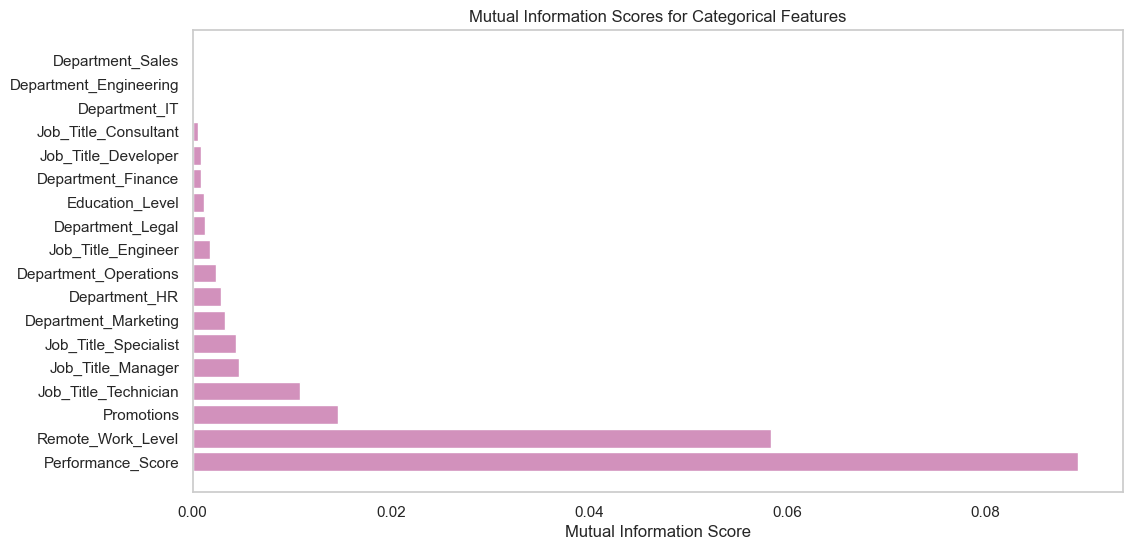

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

# List of categorical columns
categorical_columns = [col for col in df.select_dtypes(include=['object']).columns if col not in ['Employee_ID', 'Resigned']]

# Variables that have already been encoded with LabelEncoder
label_encode_columns = ['Promotions', 'Performance_Score', 'Education_Level', 'Remote_Work_Level']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to specific columns
for col in label_encode_columns:
    df[col] = label_encoder.fit_transform(df[col])

# One-hot encode only the remaining categorical columns
remaining_categorical_columns = [col for col in categorical_columns if col not in label_encode_columns]
encoder = OneHotEncoder(drop='first')  
X_encoded_sparse = encoder.fit_transform(df[remaining_categorical_columns])
X_encoded_dense = X_encoded_sparse.toarray()

# Combine label-encoded and one-hot encoded data
X_label_encoded = df[label_encode_columns]
X_combined = pd.concat([X_label_encoded, 
                        pd.DataFrame(X_encoded_dense, columns=encoder.get_feature_names_out(remaining_categorical_columns))], axis=1)
y = df['Resigned']

# Calculate mutual information for categorical variables
mutual_info_cat = mutual_info_classif(X_combined, y, random_state=42)

# DataFrame for Categorical Mutual Information
mutual_info_cat_df = pd.DataFrame({
    'Feature': X_combined.columns,
    'MI Score': mutual_info_cat
}).sort_values(by='MI Score', ascending=False)

# Reset the index to start from 1
mutual_info_cat_df.reset_index(drop=True, inplace=True)
mutual_info_cat_df.index = mutual_info_cat_df.index + 1  

# Print Mutual Information Scores 
print("\nCategorical Features - Mutual Information: \n")
print(mutual_info_cat_df)
top_n_cat_features = mutual_info_cat_df.head(5)['Feature'].tolist()
print("\nTop 5 Categorical Features:")
print(top_n_cat_features)
plt.figure(figsize=(12, 6))
plt.barh(mutual_info_cat_df['Feature'], mutual_info_cat_df['MI Score'], color="#D291BC")
plt.xlabel('Mutual Information Score')
plt.title('Mutual Information Scores for Categorical Features')
plt.grid(False)
plt.show()


#### Merge and Rank for Top 10

In [23]:
# Top 5 numerical features by MI score
top_n_num_features = mi_df.sort_values(by='MI Score', ascending=False).head(5)['Variable'].tolist()

# Top 5 categorical features by MI score
top_n_cat_features = mutual_info_cat_df.sort_values(by='MI Score', ascending=False).head(5)['Feature'].tolist()

# Combine them into Top 10 Features
top_10_features = top_n_num_features + top_n_cat_features

print(" Top 5 Numerical Features (by MI):")
for i, feat in enumerate(top_n_num_features, start=1):
    print(f"{i}. {feat}")

print("\n Top 5 Categorical Features (by MI):")
for i, feat in enumerate(top_n_cat_features, start=1):
    print(f"{i}. {feat}")

print("\n Combination of Top 10 Features:")
for i, feat in enumerate(top_10_features, start=1):
    print(f"{i}. {feat}")


 Top 5 Numerical Features (by MI):
1. Monthly_Salary
2. Work_Hours_Per_Week
3. Overtime_Hours
4. Employee_Satisfaction_Score
5. Health_Index

 Top 5 Categorical Features (by MI):
1. Performance_Score
2. Remote_Work_Level
3. Promotions
4. Job_Title_Technician
5. Job_Title_Manager

 Combination of Top 10 Features:
1. Monthly_Salary
2. Work_Hours_Per_Week
3. Overtime_Hours
4. Employee_Satisfaction_Score
5. Health_Index
6. Performance_Score
7. Remote_Work_Level
8. Promotions
9. Job_Title_Technician
10. Job_Title_Manager


### 6.0 Preparation before building model - Train and Test , SMOTE

#### Check Target Variable Count|

In [24]:
# Check Target Variable
print(df['Resigned'].value_counts())

Resigned
0    57422
1    42578
Name: count, dtype: int64


#### Split TRAIN and TEST

In [25]:
from sklearn.model_selection import train_test_split

X_cat_top = X_combined[top_n_cat_features].reset_index(drop=True)
X_num_top = df[top_n_num_features].reset_index(drop=True)
X = pd.concat([X_cat_top, X_num_top], axis=1)

y = df['Resigned']

# Split into train (80%) and test (20%) 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train set
print("[Train] class distribution:")
train_counts = y_train.value_counts()
print(train_counts)
print("Total:", train_counts.sum(), "\n")

# Test set
print("[Test] class distribution:")
test_counts = y_test.value_counts()
print(test_counts)
print("Total:", test_counts.sum())


[Train] class distribution:
Resigned
0    45938
1    34062
Name: count, dtype: int64
Total: 80000 

[Test] class distribution:
Resigned
0    11484
1     8516
Name: count, dtype: int64
Total: 20000


#### SMOTE Techniques for class imbalance

In [26]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only to training set 
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution before SMOTE:\n", y_train.value_counts())
print("\nClass distribution after SMOTE:\n", pd.Series(y_train_resampled).value_counts())


Class distribution before SMOTE:
 Resigned
0    45938
1    34062
Name: count, dtype: int64

Class distribution after SMOTE:
 Resigned
0    45938
1    45938
Name: count, dtype: int64


#### Visualition after doing class imbalance

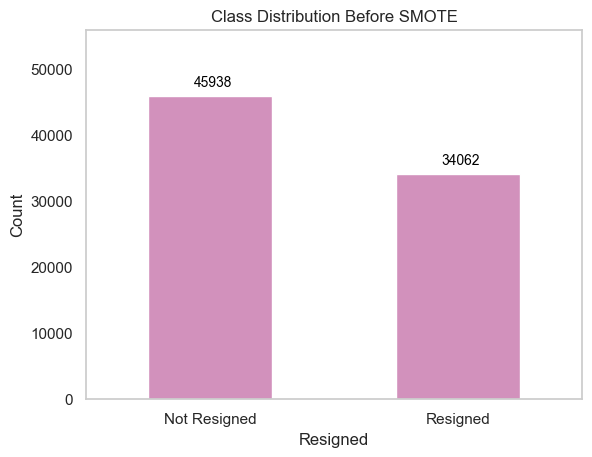

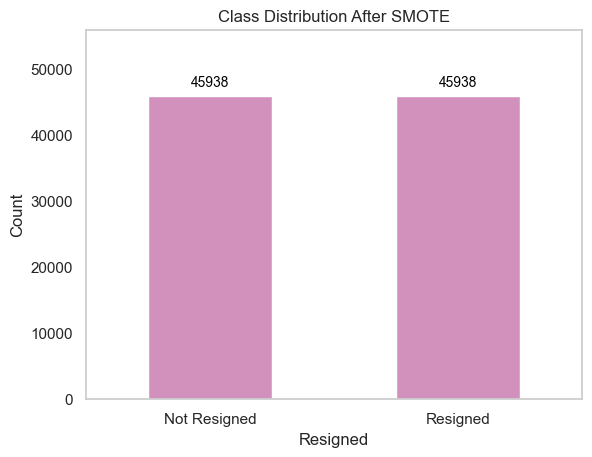

In [27]:
import matplotlib.pyplot as plt

# Before SMOTE
ax = y_train.value_counts().plot(kind='bar', title='Class Distribution Before SMOTE', color="#D291BC")
plt.xticks([0, 1], ['Not Resigned', 'Resigned'], rotation=0)  
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(2, 10), textcoords='offset points')
plt.ylim(0, max(y_train.value_counts()) + 10000)
plt.grid(False)
plt.tick_params(axis="x", bottom=False)
plt.show()

# After SMOTE
ax = y_train_resampled.value_counts().plot(kind='bar', title='Class Distribution After SMOTE', color="#D291BC")
plt.xticks([0, 1], ['Not Resigned', 'Resigned'], rotation=0)  
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')
plt.ylim(0, max(y_train.value_counts()) + 10000)
plt.grid(False)
plt.tick_params(axis="x", bottom=False)

plt.show()


In [ ]:
print("[Test] class distribution:")
test_counts = y_test.value_counts()
print(test_counts)
print("Total:", test_counts.sum())

[Test] class distribution:
Resigned
0    11484
1     8516
Name: count, dtype: int64
Total: 20000


### 7.0 Model Building

#### 7.1 Random Forest

Confusion Matrix:
 [[9231 2253]
 [1903 6613]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.82     11484
           1       0.75      0.78      0.76      8516

    accuracy                           0.79     20000
   macro avg       0.79      0.79      0.79     20000
weighted avg       0.79      0.79      0.79     20000

Accuracy Score: 0.7922


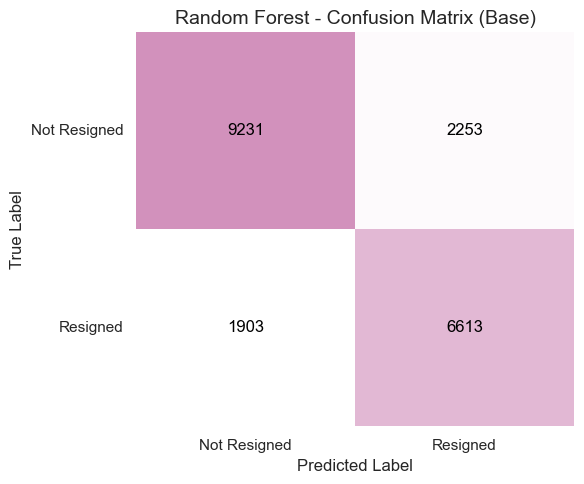

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Train on resampled data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
custom_cmap = LinearSegmentedColormap.from_list("custom", ["#ffffff", "#D291BC"])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap, cbar=False, annot_kws={"color": "black"})
plt.title('Random Forest - Confusion Matrix (Base)', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0.5, 1.5], labels=['Not Resigned', 'Resigned'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Resigned', 'Resigned'], rotation=0)
plt.tight_layout()
plt.show()

##### Random Forest - Learning Curve (Base)

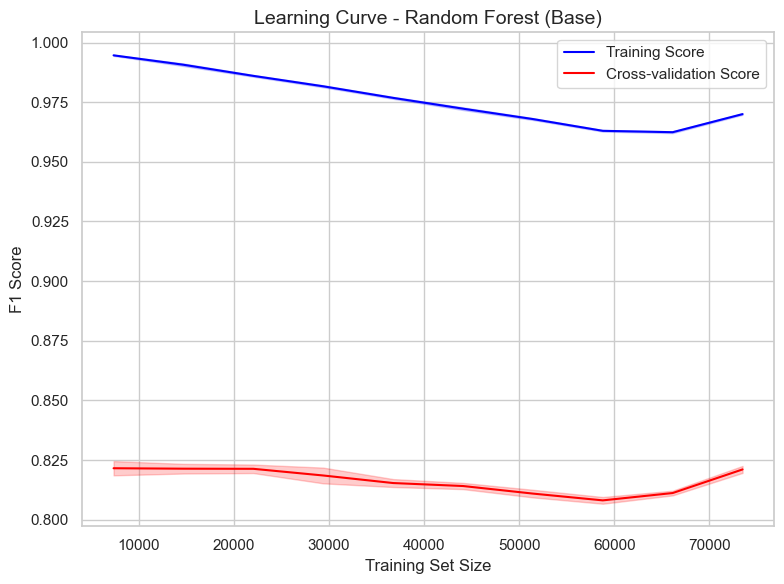

In [56]:
from sklearn.model_selection import learning_curve, StratifiedKFold
import numpy as np

# Stratified Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=rf_model,  
    X=X_train_resampled,
    y=y_train_resampled,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=cv,
    scoring='f1',
    n_jobs=-1
)

# Mean and Std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation Score', color='red')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='red')
plt.title('Learning Curve - Random Forest (Base)', fontsize=14)
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

##### Random Forest - ROC and AUC (Base)

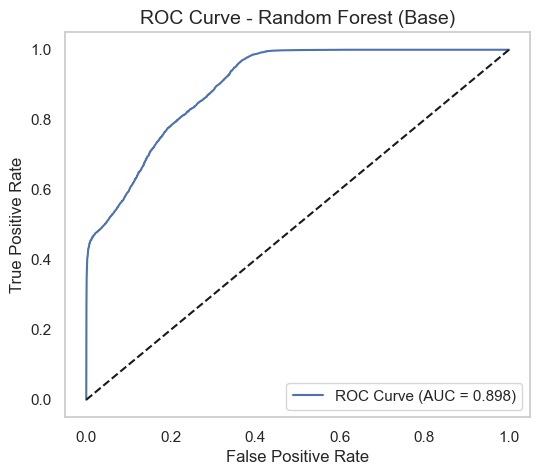

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_probs = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Base)', fontsize=14)
plt.legend()
plt.grid()
plt.show()

##### Random Forest (Tuned) - RandomizedSearchCV

Fitting 5 folds for each of 360 candidates, totalling 1800 fits

--- Best Hyperparameters for Random Forest ---
Number of Trees (n_estimators): 100
Maximum Depth (max_depth): 10
Minimum Samples to Split (min_samples_split): 10
Minimum Samples at Leaf (min_samples_leaf): 2
Max Features per Split (max_features): sqrt
Class Weight: balanced

Confusion Matrix:
 [[9578 1906]
 [1095 7421]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.83      0.86     11484
           1       0.80      0.87      0.83      8516

    accuracy                           0.85     20000
   macro avg       0.85      0.85      0.85     20000
weighted avg       0.85      0.85      0.85     20000

Accuracy Score: 0.84995


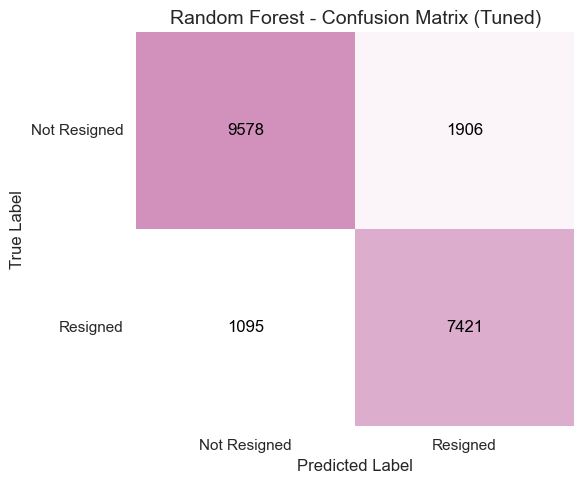

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Parameter space
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 4, 6],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced']
}

# Stratified CV
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=360,
    cv=stratified_cv,
    scoring='f1',
    verbose=1,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train_resampled, y_train_resampled)

# Evaluate best model
best_randomforest = random_search.best_estimator_
y_pred_best = best_randomforest.predict(X_test)

# Best parameters
best_params = random_search.best_params_
print("\n--- Best Hyperparameters for Random Forest ---")
print(f"Number of Trees (n_estimators): {best_params['n_estimators']}")
print(f"Maximum Depth (max_depth): {best_params['max_depth']}")
print(f"Minimum Samples to Split (min_samples_split): {best_params['min_samples_split']}")
print(f"Minimum Samples at Leaf (min_samples_leaf): {best_params['min_samples_leaf']}")
print(f"Max Features per Split (max_features): {best_params['max_features']}")
print(f"Class Weight: {best_params['class_weight']}")

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("Accuracy Score:", accuracy_score(y_test, y_pred_best))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred_best)
custom_cmap = LinearSegmentedColormap.from_list("custom", ["#ffffff", "#D291BC"])

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap, cbar=False, annot_kws={"color": "black"})
plt.title('Random Forest - Confusion Matrix (Tuned)', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0.5, 1.5], labels=['Not Resigned', 'Resigned'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Resigned', 'Resigned'], rotation=0)
plt.tight_layout()
plt.show()


##### Random Forest - Learning Curve (Tuned)

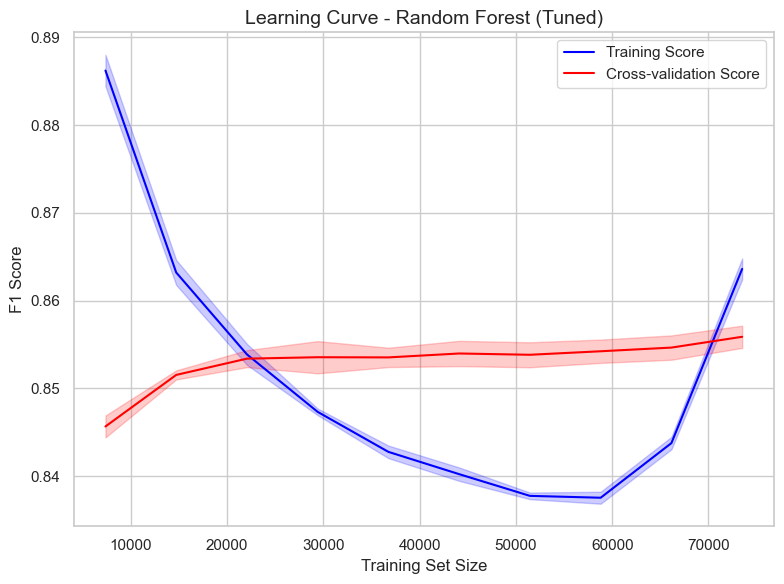

In [57]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_randomforest,
    X=X_train_resampled,
    y=y_train_resampled,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=cv,
    scoring='f1',
    n_jobs=-1
)

# Means and Std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation Score', color='red')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='red')
plt.title('Learning Curve - Random Forest (Tuned)', fontsize=14)
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

##### Randome Forest - ROC and AUC (Tuned)

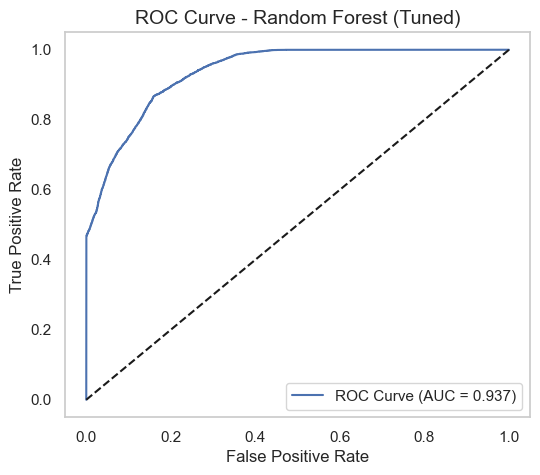

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_probs = best_randomforest.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Tuned)', fontsize=14)
plt.legend()
plt.grid()
plt.show()

##### Random Forest - Feature Importance 

Top 10 Important Features (Random Forest):
Performance_Score              0.219153
Monthly_Salary                 0.194019
Employee_Satisfaction_Score    0.144984
Work_Hours_Per_Week            0.140256
Overtime_Hours                 0.138628
Remote_Work_Level              0.094335
Promotions                     0.041863
Health_Index                   0.010586
Job_Title_Technician           0.010142
Job_Title_Manager              0.006034
dtype: float64


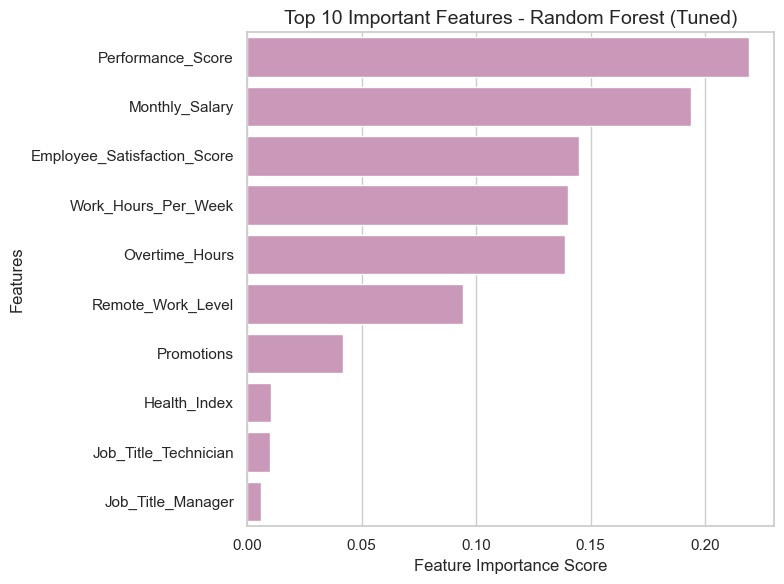

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the best Random Forest model
rf_importances = pd.Series(best_randomforest.feature_importances_, index=X.columns)
top_10_rf = rf_importances.sort_values(ascending=False).head(10)

# Print top 10
print("Top 10 Important Features (Random Forest):")
print(top_10_rf)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(
    x=top_10_rf.values,
    y=top_10_rf.index,
    color="#D291BC"  
)
plt.title('Top 10 Important Features - Random Forest (Tuned)', fontsize=14)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

#### 7.2 XGBoost 

Confusion Matrix:
 [[9392 2092]
 [1293 7223]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85     11484
           1       0.78      0.85      0.81      8516

    accuracy                           0.83     20000
   macro avg       0.83      0.83      0.83     20000
weighted avg       0.83      0.83      0.83     20000

Accuracy Score: 0.83075


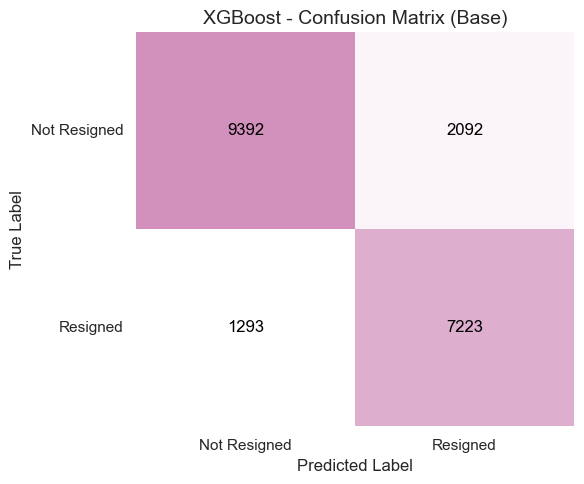

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Initialize and fit the model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
custom_cmap = LinearSegmentedColormap.from_list("custom", ["#ffffff", "#D291BC"])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap, cbar=False, annot_kws={"color": "black"})
plt.title('XGBoost - Confusion Matrix (Base)', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0.5, 1.5], labels=['Not Resigned', 'Resigned'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Resigned', 'Resigned'], rotation=0)
plt.tight_layout()
plt.show()


##### XG Boost - Learning Curve (Base)

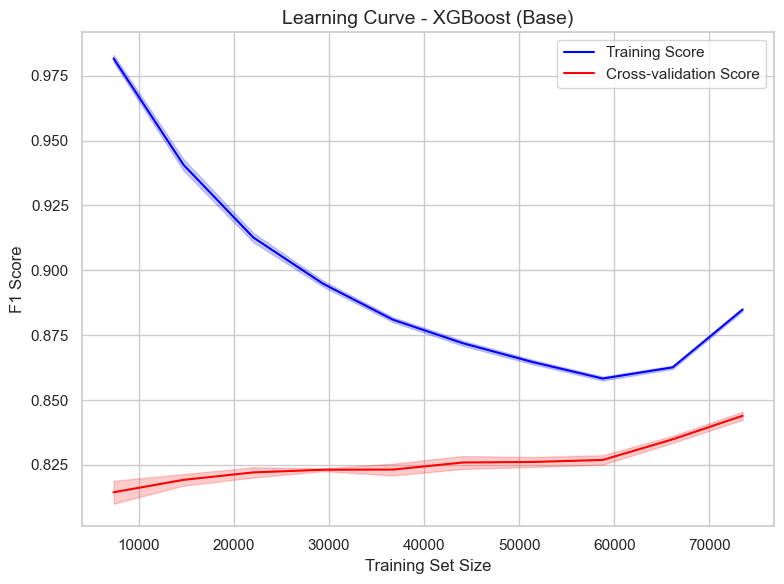

In [ ]:
from sklearn.model_selection import learning_curve, StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

# Stratified Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    estimator=xgb_model,
    X=X_train_resampled,
    y=y_train_resampled,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=cv,
    scoring='f1',
    n_jobs=-1
)

# Mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation Score', color='red')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='red')
plt.title('Learning Curve - XGBoost (Base)', fontsize=14)
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


##### XG Boost - ROC and AUC (Base) 

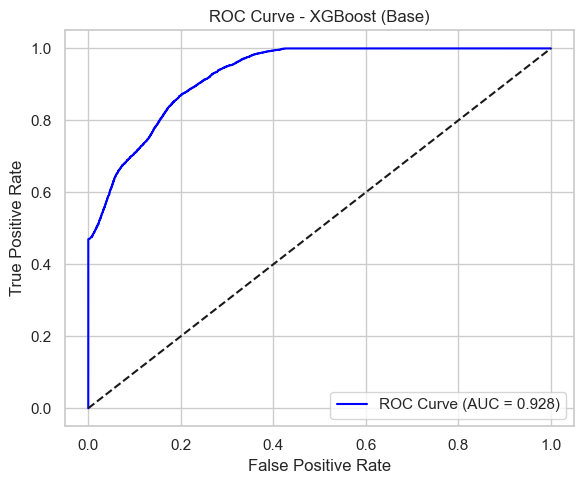

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for class 1 (Resigned)
y_probs = xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.3f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost (Base)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


##### XG Boost (Tuned) - RandomizedSearchCV 

Fitting 5 folds for each of 500 candidates, totalling 2500 fits

--- Best Hyperparameters for XGBoost ---
Number of Trees (n_estimators): 305
Maximum Tree Depth (max_depth): 5
Learning Rate: 0.0353
Subsample Ratio: 0.8999
Column Subsample (colsample_bytree): 0.8688
Gamma (Minimum Loss Reduction): 4.0901
L2 Regularization (reg_lambda): 0.4370
L1 Regularization (reg_alpha): 0.1254

Confusion Matrix:
 [[9574 1910]
 [1063 7453]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.83      0.87     11484
           1       0.80      0.88      0.83      8516

    accuracy                           0.85     20000
   macro avg       0.85      0.85      0.85     20000
weighted avg       0.86      0.85      0.85     20000

Accuracy Score: 0.85135


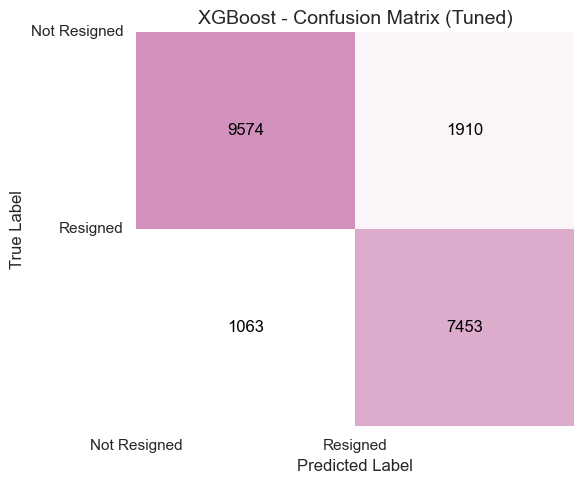

In [52]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.stats import randint, uniform
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

# StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

# Hyperparameter space
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 15),
    'learning_rate': uniform(0.01, 0.1),
    'subsample': uniform(0.6, 0.3),
    'colsample_bytree': uniform(0.6, 0.3),
    'gamma': uniform(0, 5),
    'reg_lambda': uniform(0.1, 1),
    'reg_alpha': uniform(0, 1)
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=500,
    scoring='f1',
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train_resampled, y_train_resampled)

# Best estimator
best_xgboost = random_search.best_estimator_
y_pred = best_xgboost.predict(X_test)

# Best hyperparameter 
best_params = random_search.best_params_
print("\n--- Best Hyperparameters for XGBoost ---")
print(f"Number of Trees (n_estimators): {best_params['n_estimators']}")
print(f"Maximum Tree Depth (max_depth): {best_params['max_depth']}")
print(f"Learning Rate: {best_params['learning_rate']:.4f}")
print(f"Subsample Ratio: {best_params['subsample']:.4f}")
print(f"Column Subsample (colsample_bytree): {best_params['colsample_bytree']:.4f}")
print(f"Gamma (Minimum Loss Reduction): {best_params['gamma']:.4f}")
print(f"L2 Regularization (reg_lambda): {best_params['reg_lambda']:.4f}")
print(f"L1 Regularization (reg_alpha): {best_params['reg_alpha']:.4f}")

# Evaluation
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
custom_cmap = LinearSegmentedColormap.from_list("custom", ["#ffffff", "#D291BC"])

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap, cbar=False, annot_kws={"color": "black"})
plt.title('XGBoost - Confusion Matrix (Tuned)', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Not Resigned', 'Resigned'])
plt.yticks([0, 1], ['Not Resigned', 'Resigned'], rotation=0)
plt.tight_layout()
plt.show()

##### XG Boost - Learning Curve (Tuned) 

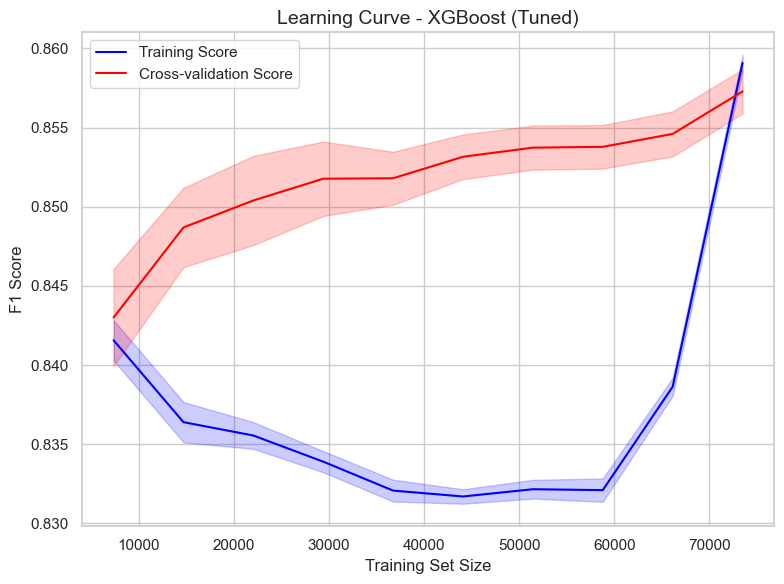

In [59]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_xgboost,
    X=X_train_resampled,
    y=y_train_resampled,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=cv,
    scoring='f1',
    n_jobs=-1
)

# Mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation Score', color='red')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='red')
plt.title('Learning Curve - XGBoost (Tuned)', fontsize=14)
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


##### XG Boost - ROC and AUC (Tuned)

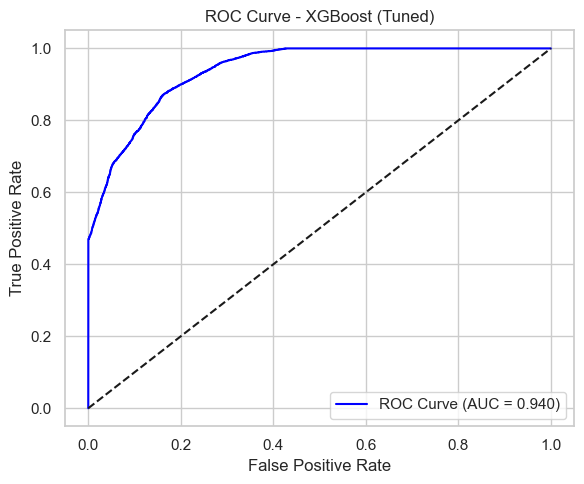

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities
y_proba = best_xgboost.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# ROC curve 
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.3f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost (Tuned)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


##### XG Boost - Feature Importance


Top 10 Important Features (XGBoost):
Performance_Score              0.195200
Monthly_Salary                 0.144966
Employee_Satisfaction_Score    0.120462
Overtime_Hours                 0.120367
Work_Hours_Per_Week            0.119715
Promotions                     0.118770
Remote_Work_Level              0.098767
Job_Title_Technician           0.048677
Job_Title_Manager              0.027199
Health_Index                   0.005876
dtype: float32


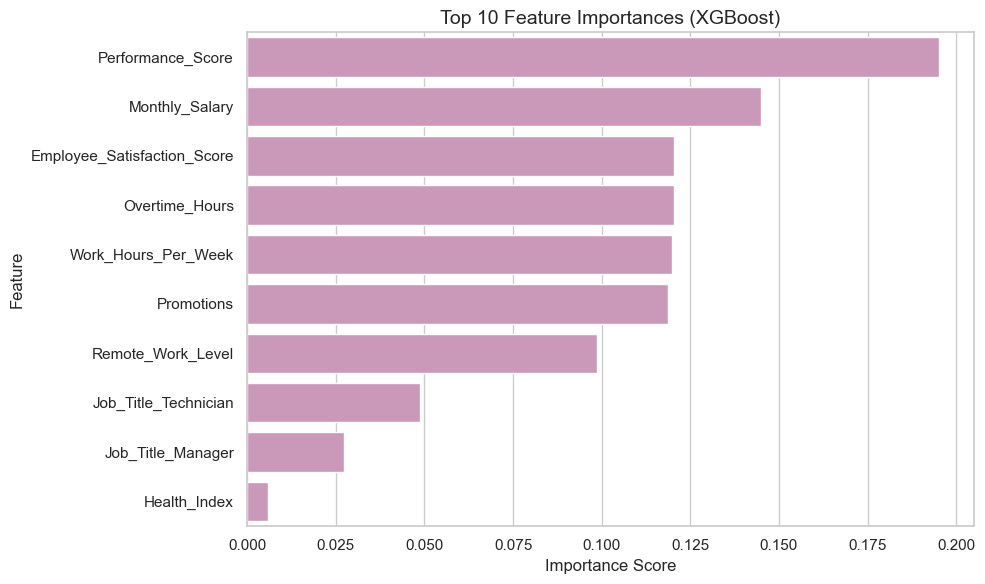

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Series with feature importances
feature_importance = pd.Series(best_xgboost.feature_importances_, index=X.columns)

# Sort top 10 features
top_10_features = feature_importance.sort_values(ascending=False).head(10)

print("\nTop 10 Important Features (XGBoost):")
print(top_10_features)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_10_features.values,
    y=top_10_features.index,
    color='#D291BC'
)
plt.title('Top 10 Feature Importances (XGBoost)', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

#### 7.3 Gradient Boost 

Confusion Matrix:
 [[9603 1881]
 [1086 7430]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87     11484
           1       0.80      0.87      0.83      8516

    accuracy                           0.85     20000
   macro avg       0.85      0.85      0.85     20000
weighted avg       0.86      0.85      0.85     20000

Accuracy Score: 0.85165


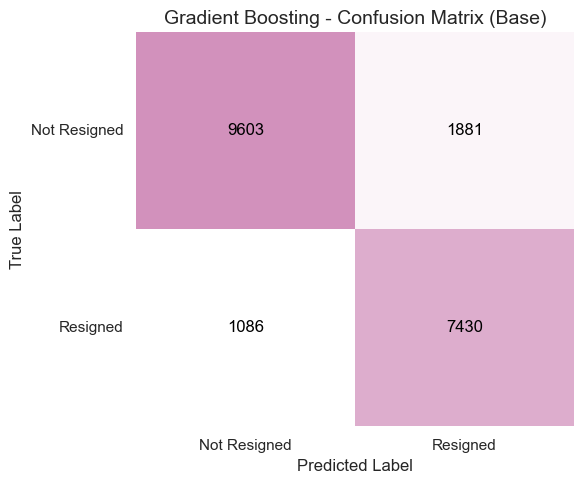

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

gb_model = GradientBoostingClassifier() 
gb_model.fit(X_train_resampled, y_train_resampled)

# Predict on test set
y_pred = gb_model.predict(X_test)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
custom_cmap = LinearSegmentedColormap.from_list("custom", ["#ffffff", "#D291BC"])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap, cbar=False, annot_kws={"color": "black"})
plt.title('Gradient Boosting - Confusion Matrix (Base)', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['Not Resigned', 'Resigned'])
plt.yticks([0.5, 1.5], ['Not Resigned', 'Resigned'], rotation=0)
plt.tight_layout()
plt.show()

##### Gradient Boost - Learning Curve (Base)

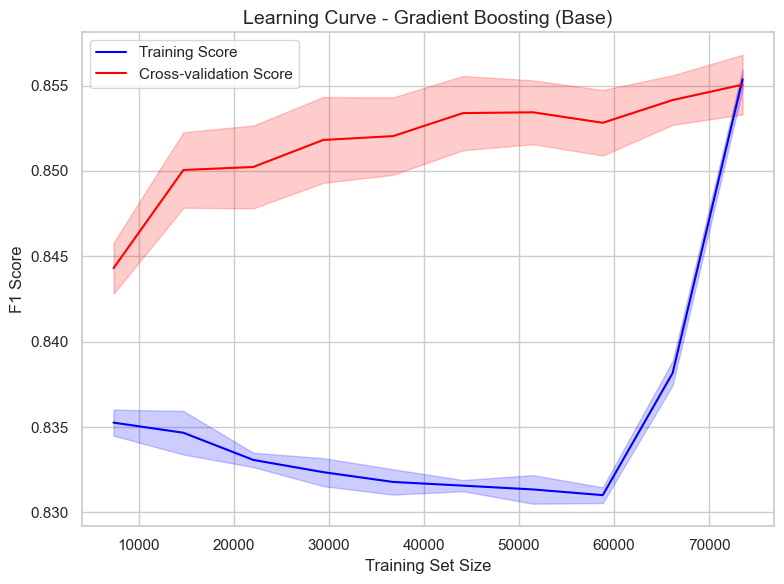

In [60]:
from sklearn.model_selection import StratifiedKFold, learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=gb_model,  
    X=X_train_resampled,
    y=y_train_resampled,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=cv,
    scoring='f1',
    n_jobs=-1
)

# Mean and Std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation Score', color='red')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='red')
plt.title('Learning Curve - Gradient Boosting (Base)', fontsize=14)
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


##### Gradient Boost - ROC and AUC (Base)

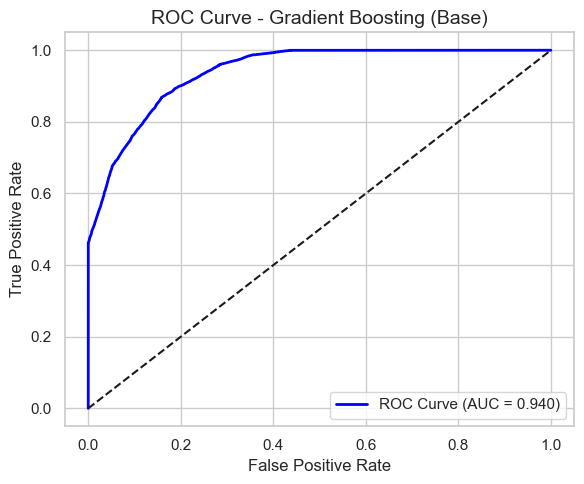

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_probs = gb_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC Curve 
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.3f})', color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting (Base)', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


##### Gradient Boost (Tuned) - RandomizedSearchCV

Fitting 5 folds for each of 500 candidates, totalling 2500 fits

--- Best Hyperparameters for Gradient Boosting ---
Number of Trees (n_estimators): 136
Learning Rate: 0.0591
Maximum Tree Depth (max_depth): 4
Min Samples to Split (min_samples_split): 12
Min Samples at Leaf (min_samples_leaf): 9
Subsample Ratio: 0.7594

Confusion Matrix:
 [[9606 1878]
 [1094 7422]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87     11484
           1       0.80      0.87      0.83      8516

    accuracy                           0.85     20000
   macro avg       0.85      0.85      0.85     20000
weighted avg       0.86      0.85      0.85     20000

Accuracy Score: 0.8514


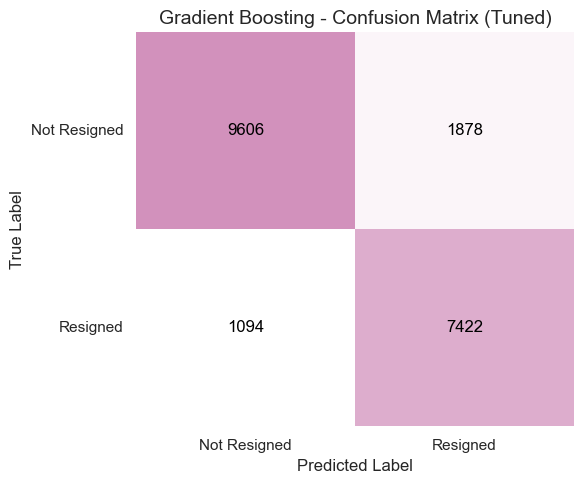

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.stats import randint, uniform
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

param_dist = {
    'n_estimators': randint(50, 150),  
    'learning_rate': uniform(0.01, 0.05),  
    'max_depth': randint(3, 5), 
    'min_samples_split': randint(10, 30),  
    'min_samples_leaf': randint(5, 15), 
    'subsample': uniform(0.7, 0.3)  
}

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize model
gb = GradientBoostingClassifier(random_state=42)

# Randomized Search CV
random_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist,
    n_iter=500,
    scoring='f1',
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train_resampled, y_train_resampled)

# Best model
best_gradientboost = random_search.best_estimator_
y_pred = best_gradientboost.predict(X_test)

# Best hyperparameter 
best_params = random_search.best_params_
print("\n--- Best Hyperparameters for Gradient Boosting ---")
print(f"Number of Trees (n_estimators): {best_params['n_estimators']}")
print(f"Learning Rate: {best_params['learning_rate']:.4f}")
print(f"Maximum Tree Depth (max_depth): {best_params['max_depth']}")
print(f"Min Samples to Split (min_samples_split): {best_params['min_samples_split']}")
print(f"Min Samples at Leaf (min_samples_leaf): {best_params['min_samples_leaf']}")
print(f"Subsample Ratio: {best_params['subsample']:.4f}")

# Evaluation
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)
custom_cmap = LinearSegmentedColormap.from_list("custom", ["#ffffff", "#D291BC"])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap, cbar=False, annot_kws={"color": "black"})
plt.title('Gradient Boosting - Confusion Matrix (Tuned)', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0.5, 1.5], labels=['Not Resigned', 'Resigned'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Resigned', 'Resigned'], rotation=0)
plt.tight_layout()
plt.show()

##### Gradient Boost - Learning Curve (Tuned)

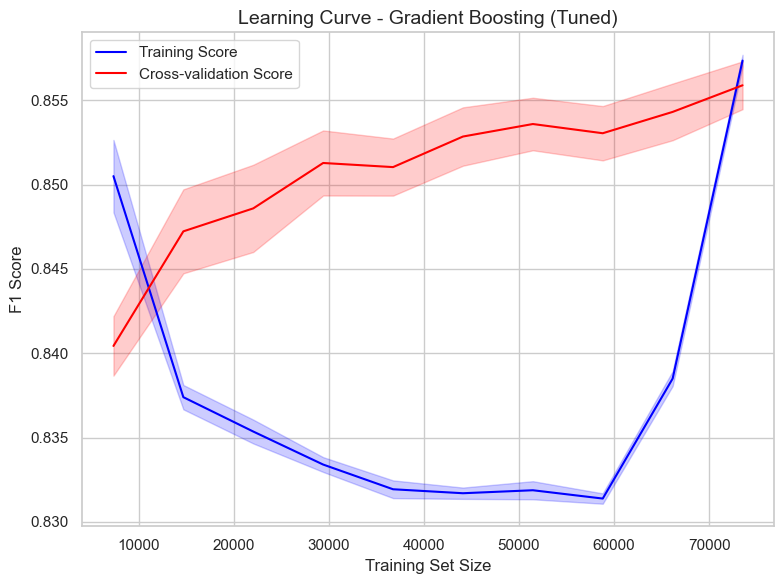

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_gradientboost,
    X=X_train_resampled,
    y=y_train_resampled,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=cv,
    n_jobs=-1,
    scoring='f1'
)

# Mean and Std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
plt.plot(train_sizes, test_mean, label="Cross-validation Score", color="red")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="red")
plt.title("Learning Curve - Gradient Boosting (Tuned)", fontsize=14)
plt.xlabel("Training Set Size")
plt.ylabel("F1 Score")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

##### Gradient Boost - ROC and AUC (Tuned)

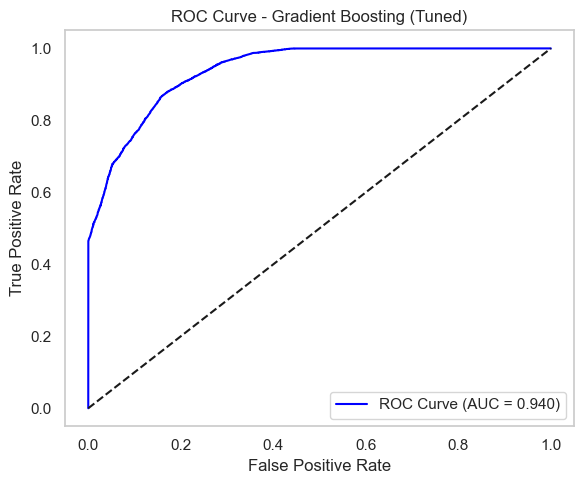

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_probs = best_gradientboost.predict_proba(X_test)[:, 1]

# Calculate ROC curve & AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# 4. Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.3f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting (Tuned)')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()

##### Gradient Boost - Feature Importance

Top 10 Important Features (Gradient Boosting):
Performance_Score              0.259113
Employee_Satisfaction_Score    0.162117
Monthly_Salary                 0.152476
Work_Hours_Per_Week            0.147289
Overtime_Hours                 0.143229
Remote_Work_Level              0.079344
Promotions                     0.054895
Job_Title_Manager              0.000915
Health_Index                   0.000618
Job_Title_Technician           0.000003
dtype: float64


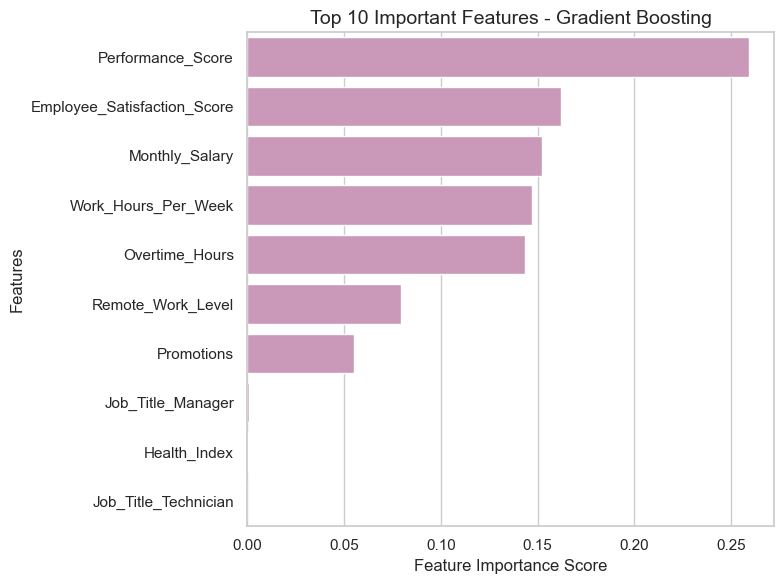

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
feature_importance = pd.Series(best_gradientboost.feature_importances_, index=X.columns)
top_10_features = feature_importance.sort_values(ascending=False).head(10)

# Print top features
print("Top 10 Important Features (Gradient Boosting):")
print(top_10_features)

# Plot with custom color
plt.figure(figsize=(8, 6))
sns.barplot(
    x=top_10_features.values,
    y=top_10_features.index,
    color="#D291BC" 
)
plt.title('Top 10 Important Features - Gradient Boosting', fontsize=14)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


#### 7.4 Support Vector Machine

##### SVM (Base)- Random Run 50%

Confusion Matrix:
 [[7477 4007]
 [2818 5698]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.65      0.69     11484
           1       0.59      0.67      0.63      8516

    accuracy                           0.66     20000
   macro avg       0.66      0.66      0.66     20000
weighted avg       0.67      0.66      0.66     20000

Accuracy Score: 0.65875


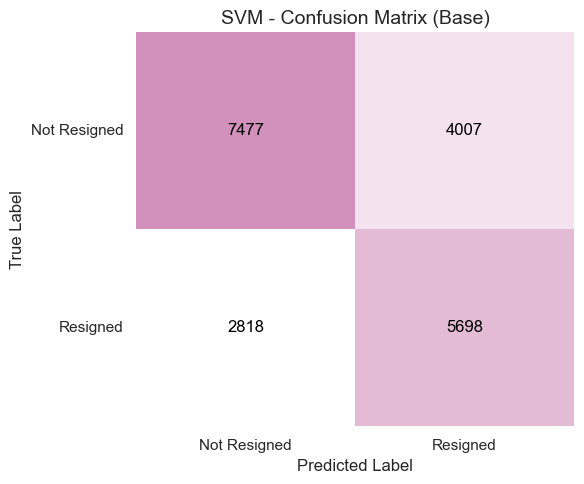

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

# Take 50% sample subset from the resampled training data
subset_indices = np.random.choice(len(X_train_resampled), size=45938, replace=False)
X_train_subset = X_train_resampled.iloc[subset_indices]
y_train_subset = y_train_resampled.iloc[subset_indices]

svm_model_subset = SVC()
svm_model_subset.fit(X_train_subset, y_train_subset)

y_pred = svm_model_subset.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
custom_cmap = LinearSegmentedColormap.from_list("custom", ["#ffffff", "#D291BC"])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap, cbar=False, annot_kws={"color": "black"})
plt.title('SVM - Confusion Matrix (Base)', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['Not Resigned', 'Resigned'])
plt.yticks([0.5, 1.5], ['Not Resigned', 'Resigned'], rotation=0)
plt.tight_layout()
plt.show()


##### SVM - Learing Curve (Base) 

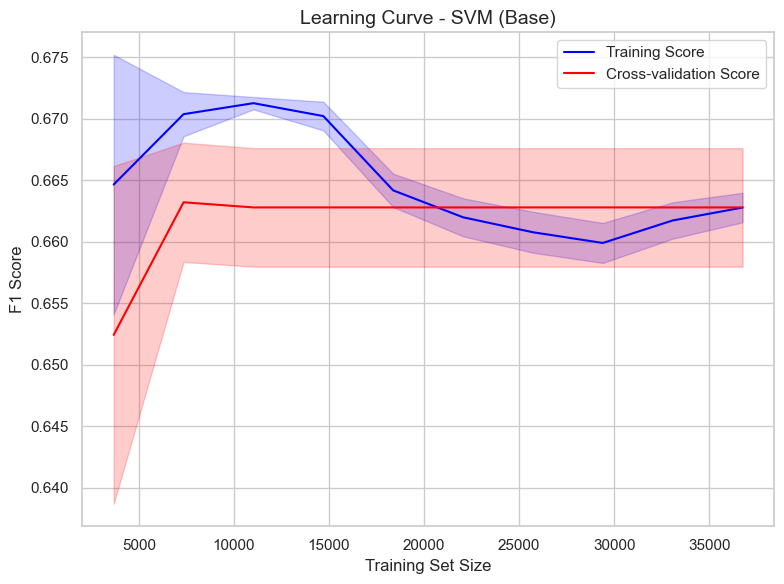

In [62]:
from sklearn.model_selection import StratifiedKFold, learning_curve
import numpy as np
import matplotlib.pyplot as plt

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    estimator=svm_model_subset,
    X=X_train_subset,
    y=y_train_subset,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=cv,
    scoring='f1',
    n_jobs=-1
)

# Mean and Std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
plt.plot(train_sizes, test_mean, label="Cross-validation Score", color="red")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="red")
plt.title("Learning Curve - SVM (Base)", fontsize=14)
plt.xlabel("Training Set Size")
plt.ylabel("F1 Score")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

##### SVM - ROC and AUC (Base)

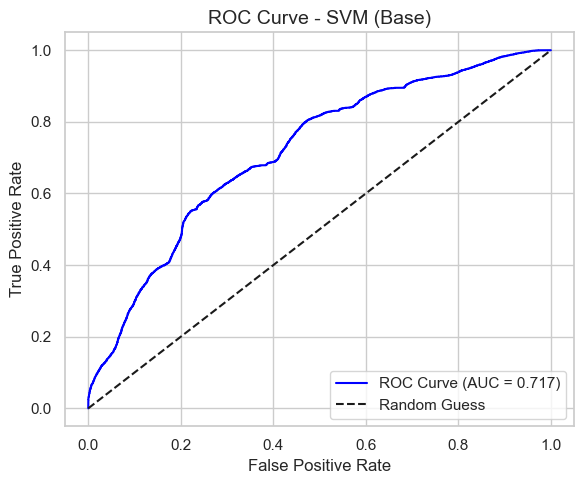

In [44]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_probs = svm_model_subset.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.3f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM (Base)', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


##### Support Vector Machine (Tuned) - RandomizedSearchCV - 50%

Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- Best Hyperparameters for Support Vector Machine ---
Regularization Parameter (C): 6.1754
Kernel Coefficient (gamma): 0.1715
Kernel Type: rbf

Confusion Matrix:
 [[9201 2283]
 [1311 7205]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.80      0.84     11484
           1       0.76      0.85      0.80      8516

    accuracy                           0.82     20000
   macro avg       0.82      0.82      0.82     20000
weighted avg       0.83      0.82      0.82     20000

Accuracy Score: 0.8203


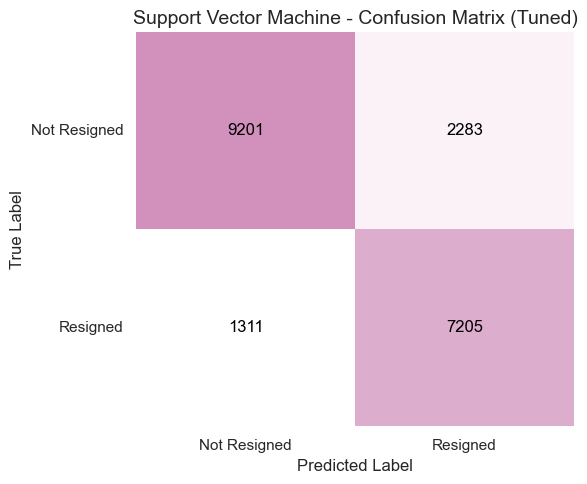

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from scipy.stats import uniform

param_dist = {
    'svm__C': uniform(0.1, 10),
    'svm__gamma': uniform(0.001, 1),
    'svm__kernel': ['rbf']
}

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True, random_state=42))
])

# Take 50% sample subset from resampled training data
subset_indices = np.random.choice(X_train_resampled.shape[0], size=45938, replace=False)
X_train_sampled = X_train_resampled.iloc[subset_indices]
y_train_sampled = y_train_resampled.iloc[subset_indices]

# Stratified 5-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=svm_pipeline,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1',
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train_sampled, y_train_sampled)

best_svm_model = random_search.best_estimator_
y_pred = best_svm_model.predict(X_test)

# Print best parameters
best_params = random_search.best_params_
print("\n--- Best Hyperparameters for Support Vector Machine ---")
print(f"Regularization Parameter (C): {best_params['svm__C']:.4f}")
print(f"Kernel Coefficient (gamma): {best_params['svm__gamma']:.4f}")
print(f"Kernel Type: {best_params['svm__kernel']}")

# Evaluation metrics
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
custom_cmap = LinearSegmentedColormap.from_list("custom", ["#ffffff", "#D291BC"])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap, cbar=False, annot_kws={"color": "black"})
plt.title('Support Vector Machine - Confusion Matrix (Tuned)', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0.5, 1.5], labels=['Not Resigned', 'Resigned'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Resigned', 'Resigned'], rotation=0)
plt.tight_layout()
plt.show()

##### Support Vector Machine - Learning Curve (Tuned) 

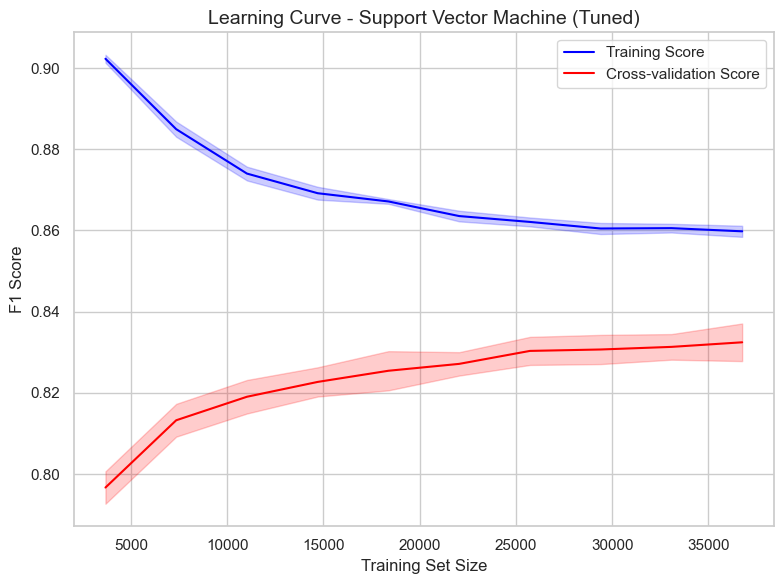

In [33]:
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_svm_model,
    X=X_train_sampled,
    y=y_train_sampled,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=cv,
    scoring='f1',
    n_jobs=-1
)

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
plt.plot(train_sizes, test_mean, label="Cross-validation Score", color="red")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="red")
plt.title("Learning Curve - Support Vector Machine (Tuned)", fontsize=14)
plt.xlabel("Training Set Size")
plt.ylabel("F1 Score")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()


##### Support Vector Machine - ROC and AUC Score (Tuned) 

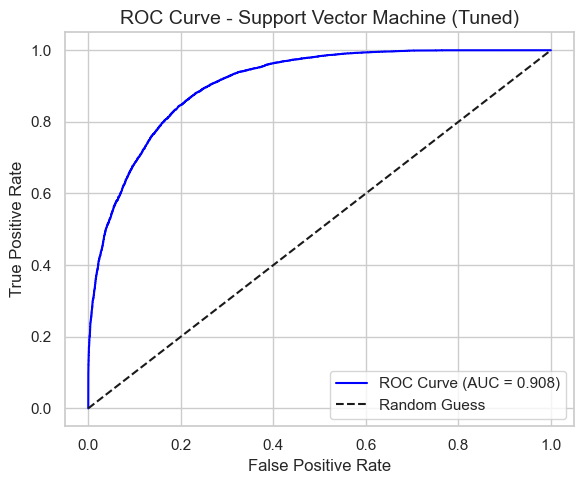

In [31]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_probs = best_svm_model.predict_proba(X_test)[:, 1] 

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.3f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Support Vector Machine (Tuned)', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

##### Support Vector Machine - Permutation Importance


Top 10 Important Features (Support Vector Machine - Permutation Importance):
Performance_Score              0.125574
Monthly_Salary                 0.076769
Work_Hours_Per_Week            0.065893
Overtime_Hours                 0.065580
Employee_Satisfaction_Score    0.063557
Remote_Work_Level              0.046870
Promotions                     0.029244
Job_Title_Technician           0.009141
Job_Title_Manager              0.006029
Health_Index                   0.001163
dtype: float64


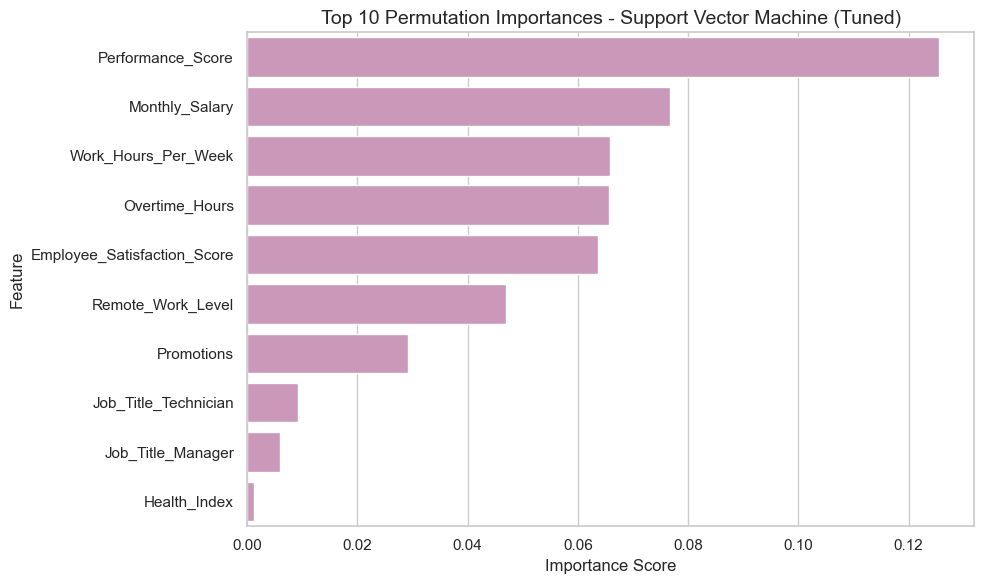

In [32]:
from sklearn.inspection import permutation_importance

# Run permutation importance on test data
result = permutation_importance(best_svm_model, X_test, y_test, scoring='f1', n_repeats=10, random_state=42, n_jobs=-1)

# Extract and sort
svm_perm_importance = pd.Series(result.importances_mean, index=X.columns).sort_values(ascending=False)

print("\nTop 10 Important Features (Support Vector Machine - Permutation Importance):")
print(svm_perm_importance.head(10))

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=svm_perm_importance.head(10).values,
    y=svm_perm_importance.head(10).index,
    color='#D291BC'
)
plt.title("Top 10 Permutation Importances - Support Vector Machine (Tuned)", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

### 8.0 Model Deployment

In [ ]:
import joblib

joblib.dump(best_xgboost, 'employee_churn_model.pkl') 

['employee_churn_model.pkl']